## Построение зависимостей переменных core_case

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from  xgboost import XGBRegressor
from sklearn import linear_model
from catboost import CatBoostRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pathlib
from pathlib import Path
warnings.filterwarnings('ignore')
sns.set()
# не забудьте проинсталировать бибилиотеки, в случаи их отсутсвия

In [2]:
df = pd.read_csv(r"Core_Case_vse (1).csv")

In [ ]:
df.dtypes

In [4]:
df.drop(labels = ['DEPTH'], axis = 1, inplace = True)

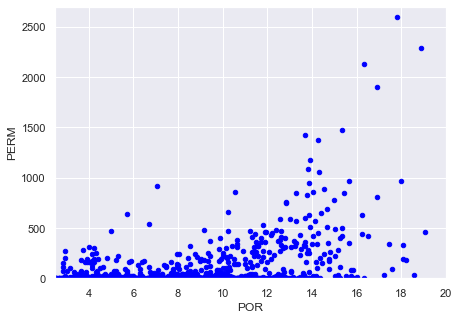

In [8]:
df.plot(x='POR', y='PERM', kind = 'scatter', color= 'blue',figsize = (7,5)) #в цвет сириуса)
plt.xlim(2.5, 20)
plt.ylim(0, 2700)
plt.show()

In [6]:
corr = df.corr()

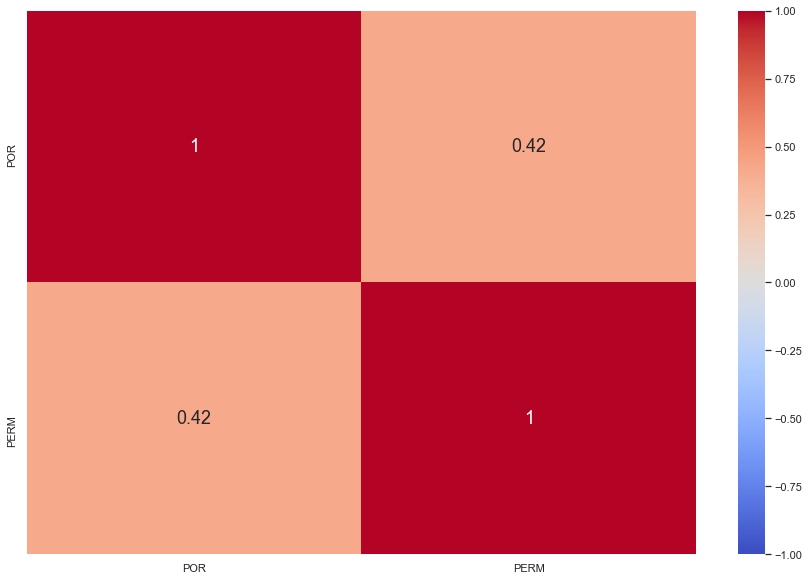

In [16]:
plt.figure(figsize = (15,10)) #Постройка тепловой карты, отображающая коэфициент корелляции
plt.rcParams['font.size'] = '18'
sns.heatmap(corr, vmin = -1, cmap='coolwarm', annot=True,color='w')

## Датасет с данными ГИС + данные по керну

In [542]:
df = pd.read_csv(r"Itog_data.csv")

In [543]:
df.drop(labels=['Unnamed: 16'], axis=1, inplace=True)

In [161]:
df

,WELL,DEPTH,DS,DTP,DTS,RT,GK,MRP,PEF,POTA,RHOB,THOR,URAN,W,POR,PERM
0,1,1520.0688,226.1933,237.5678,438.5081,24.72247,11.39114,0.073459,3.791441,3.737308,2.731635,9.725192,4.358474,21.17801,2.115032,0.894270
1,1,1520.2212,226.1630,236.9533,437.4794,24.69691,11.43125,0.070356,3.805186,3.473548,2.722061,9.852848,4.177304,20.25461,2.115032,0.894270
2,1,1520.3736,226.3184,236.5196,435.4599,25.04134,11.09864,0.072246,3.807401,3.430774,2.718739,11.448580,3.785044,21.21677,2.115032,0.894270
3,1,1520.5260,226.8924,236.4247,433.4996,25.06509,11.29744,0.077318,3.788662,3.529731,2.723557,12.791240,2.820594,22.76807,2.115032,0.894270
4,1,1520.6784,226.7658,236.8392,431.9535,24.69434,11.31604,0.080872,3.781182,3.824730,2.727801,11.570520,3.024924,24.31121,2.115032,0.894270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17747,9,1885.5000,216.9017,168.8540,299.6920,222.08400,17.76000,0.027500,2.279700,1.750000,2.612000,27.515800,8.465100,0.50000,7.207200,0.618842
17748,9,1885.6000,216.3051,168.8130,298.3220,222.08400,17.87300,0.028800,2.271100,2.050000,2.611000,27.759900,8.005700,0.50000,7.207200,0.618842
17749,9,1885.7000,216.2533,168.5290,297.1280,222.08400,18.48700,0.030000,2.285600,2.320000,2.605000,27.976400,7.887500,0.49000,7.207200,0.618842
17750,9,1885.8000,216.6462,167.8490,296.1980,222.08400,19.10100,0.031100,2.319500,2.560000,2.596000,28.162400,8.046400,0.48000,7.207200,0.618842


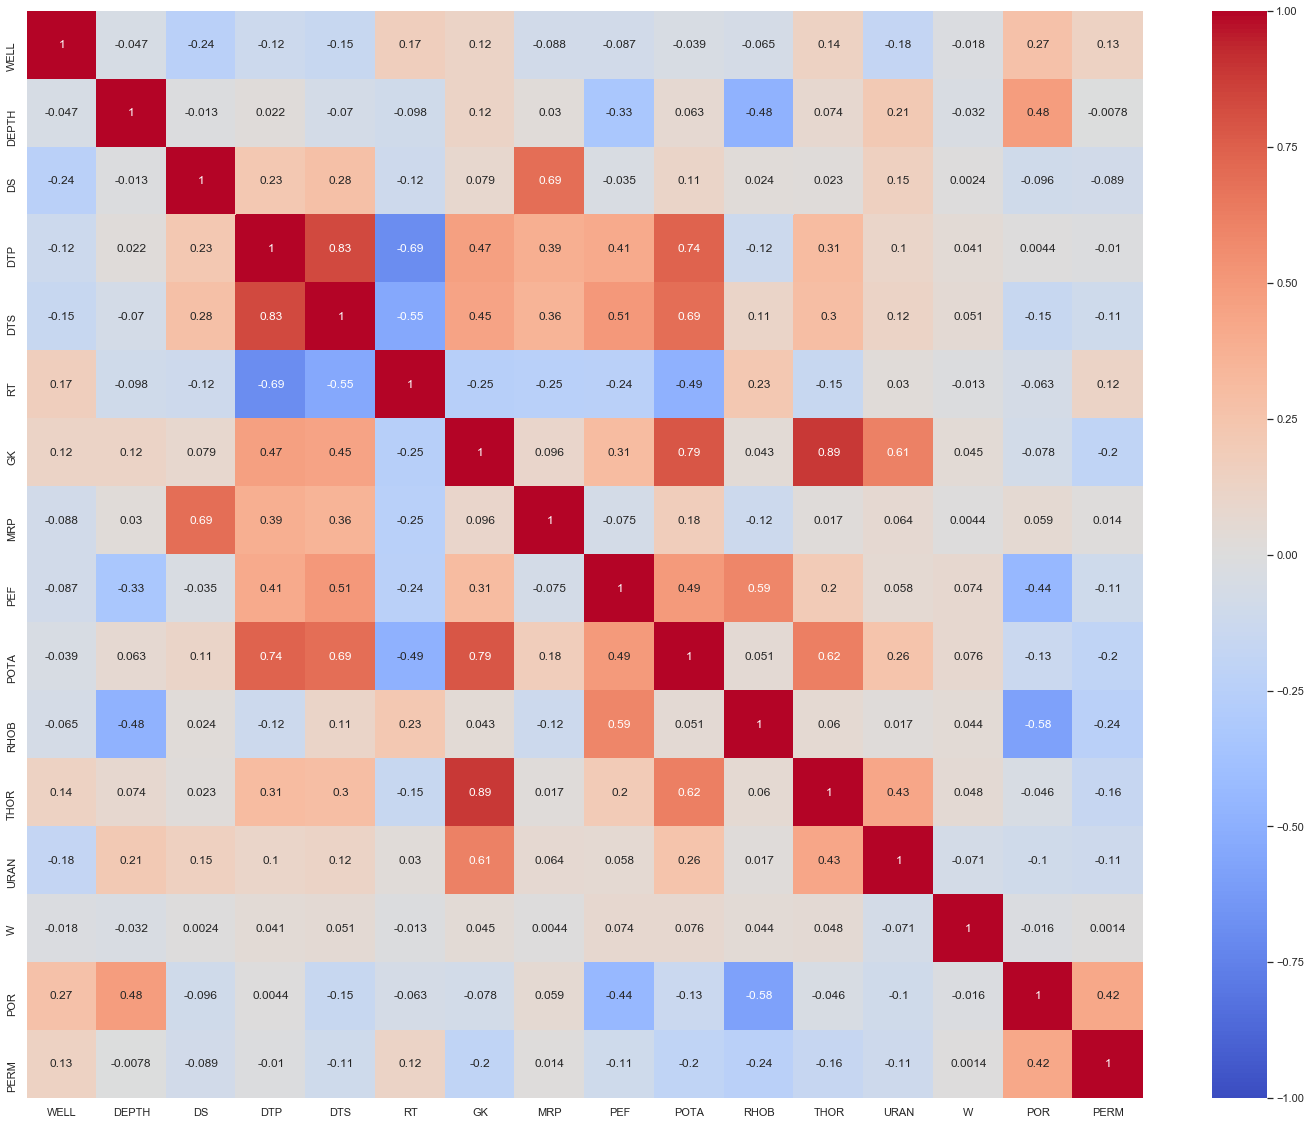

In [24]:
corr = df.corr()
plt.figure(figsize = (25,20)) #Постройка тепловой карты, отображающая коэфициент корелляции
sns.heatmap(corr, vmin = -1, cmap='coolwarm', annot=True)

In [162]:
pr = df['PERM']
pos = df.drop('PERM', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(pos, pr, test_size = 0.2, random_state = 10)

In [163]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [164]:
pd.isnull(df).any()

WELL     False
DEPTH    False
DS       False
DTP      False
DTS      False
RT       False
GK       False
MRP      False
PEF      False
POTA     False
RHOB     False
THOR     False
URAN     False
W        False
POR      False
PERM     False
dtype: bool

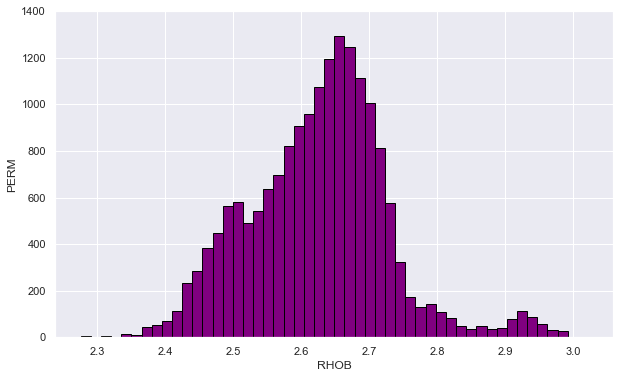

In [165]:
plt.figure(figsize=(10,6))
plt.hist(df['RHOB'], bins = 50, ec = 'black', color='purple')
plt.xlabel('RHOB')#'WELL', 'DEPTH', 'DS', 'DTP', 'DTS', 'RT', 'GK', 'MRP', 'PEF',
                  #'RHOB', 'THOR', 'URAN', 'W', 'POR'
plt.ylabel('PERM')
plt.ylim(0, 1400)
plt.show()
# распределение проницаемости и ГИС

## Мультилинейная регрессия

In [166]:
perm = df['PERM']
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.2, random_state = 10)

In [167]:
reqr = LinearRegression()
reqr.fit(x_train, y_train)

print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))
pd.DataFrame(data=reqr.coef_, index=x_train.columns, columns=['coef'])

точность прогноза для тренировочных данных =  0.35864302389044533
точность прогноза для тестовых данных  =  0.30713301781474245


,coef
WELL,1.557936
DEPTH,-0.365597
DS,-0.573964
DTP,1.332239
DTS,-0.132697
RT,0.807768
GK,-17.137816
MRP,72.874468
PEF,78.819460
POTA,-6.562218


In [168]:
df['PERM'].skew()

8.758241716980935

In [169]:
y_log = np.log(df['PERM'])
y_log.tail()

17747   -0.479906
17748   -0.479906
17749   -0.479906
17750   -0.479906
17751   -0.479906
Name: PERM, dtype: float64

In [170]:
y_log.skew()

-0.13707766271882274

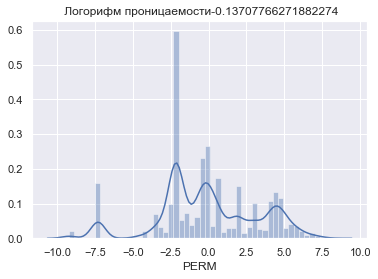

In [171]:
sns.distplot(y_log)
plt.title(f' Логорифм проницаемости{y_log.skew()}')
plt.show()
#теперь значения невелированные

In [172]:
perm = np.log(df['PERM'])
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.2, random_state = 10)

reqr = LinearRegression()
reqr.fit(x_train, y_train)

print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))
pd.DataFrame(data=reqr.coef_, index=x_train.columns, columns=['coef'])

точность прогноза для тренировочных данных =  0.5092731940178914
точность прогноза для тестовых данных  =  0.4994725689212032


,coef
WELL,0.089019
DEPTH,-0.003702
DS,-0.023953
DTP,0.040349
DTS,-0.010017
RT,0.001562
GK,-0.319111
MRP,0.807637
PEF,1.769975
POTA,0.283316


In [173]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()
pd.DataFrame({'coef': results.params,'p-value': round(results.pvalues, 3)})

,coef,p-value
const,16.495570,0.000
WELL,0.089019,0.000
DEPTH,-0.003702,0.000
DS,-0.023953,0.000
DTP,0.040349,0.000
DTS,-0.010017,0.000
RT,0.001562,0.004
GK,-0.319111,0.000
MRP,0.807637,0.004
PEF,1.769975,0.000


In [174]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)

1.876502924288549

In [175]:
vif = [variance_inflation_factor(exog=x_incl_const.values,exog_idx=i) for i in range(x_incl_const.shape[1])]

pd.DataFrame({'coef_name': x_incl_const.columns, 'vif':np.around(vif,2)})
# проверка на мультиколлениарность(связь параметр - параметр плохо)

,coef_name,vif
0,const,3245.42
1,WELL,1.88
2,DEPTH,1.69
3,DS,2.19
4,DTP,6.34
5,DTS,4.07
6,RT,2.11
7,GK,28.23
8,MRP,2.39
9,PEF,2.90


In [191]:
# Уточним BIC
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()
org_coef = pd.DataFrame({'coef': results.params,'p-value': round(results.pvalues, 3)})

print('Сложность модели ', results.bic)
print('Квадратичная ошибка', results.rsquared)

Сложность модели  64128.4852185515
Квадратичная ошибка 0.5092731940178912


In [190]:
# Уточним BIC
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop (['GK'],axis=1)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()
org_coef = pd.DataFrame({'coef': results.params,'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)
# просмотрев все параметры можно сделать вывод, что при удалении параметров точность модели падает и растёт её сложность

BIC is 64307.945256389634
r-squared is 0.5026977561603464


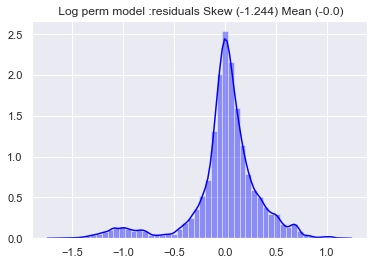

In [365]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'blue')
plt.title(f' Log perm model :residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()
# по графику видно, что данные подчиняются закону нормального распределения

## Лассо

In [544]:
df = pd.read_csv(r"Itog_data.csv")

In [45]:
df.drop(labels=['Unnamed: 16'], axis=1, inplace=True)

In [46]:
perm = df['PERM']
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.2, random_state = 10)

In [47]:
lasso_model = Lasso()
lasso_model.fit(X=x_train, y=y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
y_log = np.log(df['PERM'])
y_log.tail()

17747   -0.479906
17748   -0.479906
17749   -0.479906
17750   -0.479906
17751   -0.479906
Name: PERM, dtype: float64

In [50]:
perm = np.log(df['PERM'])
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.2, random_state = 10)

reqr = Lasso()
reqr.fit(x_train, y_train)

print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))
print('intercept',reqr.intercept_)
pd.DataFrame(data=reqr.coef_, index=x_train.columns, columns=['coef'])

точность прогноза для тренировочных данных =  0.45653509416204024
точность прогноза для тестовых данных  =  0.45206667444739557
intercept -2.0351041780956


,coef
WELL,0.000000
DEPTH,-0.001144
DS,-0.028559
DTP,0.051632
DTS,-0.010479
RT,0.000000
GK,-0.000000
MRP,-0.000000
PEF,0.000000
POTA,-0.000000


## Метод ближайших точек

In [51]:
df = pd.read_csv(r"Itog_data.csv")

In [52]:
df.drop(labels=['Unnamed: 16'], axis=1, inplace=True)

In [53]:
perm = df['PERM']
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.2, random_state = 10)

In [54]:
y_log = np.log(df['PERM'])
y_log.tail()

17747   -0.479906
17748   -0.479906
17749   -0.479906
17750   -0.479906
17751   -0.479906
Name: PERM, dtype: float64

In [55]:
knn = neighbors.KNeighborsRegressor() #присваиваем модель переменной
knn.fit(x_train, y_train) #Запускаем модель обучатся на обучающей выборке
y_pred = knn.predict(x_test) #Запускаем модель предсказывать результат выполнения алгоритма на тестовой выборке


In [56]:
y_pred

array([9.61480244e-01, 5.04000000e+00, 1.26570000e+02, ...,
       1.00000000e-04, 2.14056600e+00, 5.45300000e+01])

In [58]:
perm = np.log(df['PERM'])
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.2, random_state = 10)

reqr = neighbors.KNeighborsRegressor()
reqr.fit(x_train, y_train)

print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))

точность прогноза для тренировочных данных =  0.9287805660608929
точность прогноза для тестовых данных  =  0.8813852195758927


## Градиентный бустинг CAT

In [3]:
df = pd.read_csv(r"LOG_Case_vse (1).csv",comment=";")

In [4]:
df.drop(labels=['URAN'], axis=1, inplace=True)

In [5]:
data_train = abs(np.log(df[df.index<17429])) #создание нового датасета для тестирования (тестовая выборка)
data_test = abs(np.log(df[df.index>17751]))

In [6]:
x_test=data_test.drop(labels=['PERM'], axis=1, inplace=False)
x_train=data_train.drop(labels=['PERM'], axis=1, inplace=False)
y_train=data_train['PERM']
y_test=data_test['PERM']

In [7]:
cbr = CatBoostRegressor(iterations=1000, learning_rate=1, depth=None,)
cbr.fit(x_train, y_train)
y_pred = cbr.predict(x_test)

0:	learn: 1.3429609	total: 78.8ms	remaining: 1m 18s
1:	learn: 1.1601676	total: 98.6ms	remaining: 49.2s
2:	learn: 1.0489093	total: 233ms	remaining: 1m 17s
3:	learn: 1.0081671	total: 252ms	remaining: 1m 2s
4:	learn: 0.9565011	total: 306ms	remaining: 1m
5:	learn: 0.9279781	total: 369ms	remaining: 1m 1s
6:	learn: 0.9031209	total: 395ms	remaining: 56s
7:	learn: 0.8677148	total: 420ms	remaining: 52.1s
8:	learn: 0.8451763	total: 467ms	remaining: 51.5s
9:	learn: 0.8343477	total: 488ms	remaining: 48.3s
10:	learn: 0.8083628	total: 549ms	remaining: 49.4s
11:	learn: 0.7861793	total: 570ms	remaining: 46.9s
12:	learn: 0.7568166	total: 629ms	remaining: 47.7s
13:	learn: 0.7409456	total: 688ms	remaining: 48.4s
14:	learn: 0.7257479	total: 815ms	remaining: 53.5s
15:	learn: 0.7129874	total: 856ms	remaining: 52.6s
16:	learn: 0.7013309	total: 997ms	remaining: 57.6s
17:	learn: 0.6956271	total: 1.02s	remaining: 55.8s
18:	learn: 0.6782568	total: 1.14s	remaining: 59s
19:	learn: 0.6660974	total: 1.3s	remaining: 

161:	learn: 0.2732989	total: 9.31s	remaining: 48.1s
162:	learn: 0.2720157	total: 9.33s	remaining: 47.9s
163:	learn: 0.2715165	total: 9.38s	remaining: 47.8s
164:	learn: 0.2708651	total: 9.42s	remaining: 47.7s
165:	learn: 0.2700270	total: 9.44s	remaining: 47.4s
166:	learn: 0.2689375	total: 9.51s	remaining: 47.5s
167:	learn: 0.2682780	total: 9.58s	remaining: 47.4s
168:	learn: 0.2674747	total: 9.72s	remaining: 47.8s
169:	learn: 0.2667148	total: 9.74s	remaining: 47.6s
170:	learn: 0.2658577	total: 9.82s	remaining: 47.6s
171:	learn: 0.2651467	total: 9.85s	remaining: 47.4s
172:	learn: 0.2639205	total: 9.96s	remaining: 47.6s
173:	learn: 0.2631701	total: 10.1s	remaining: 47.8s
174:	learn: 0.2626039	total: 10.1s	remaining: 47.6s
175:	learn: 0.2616141	total: 10.2s	remaining: 47.6s
176:	learn: 0.2606068	total: 10.2s	remaining: 47.5s
177:	learn: 0.2596529	total: 10.3s	remaining: 47.5s
178:	learn: 0.2590678	total: 10.3s	remaining: 47.4s
179:	learn: 0.2585191	total: 10.4s	remaining: 47.4s
180:	learn: 

323:	learn: 0.1756577	total: 16.1s	remaining: 33.6s
324:	learn: 0.1752770	total: 16.1s	remaining: 33.5s
325:	learn: 0.1747326	total: 16.2s	remaining: 33.4s
326:	learn: 0.1743791	total: 16.2s	remaining: 33.3s
327:	learn: 0.1739650	total: 16.2s	remaining: 33.2s
328:	learn: 0.1735287	total: 16.3s	remaining: 33.2s
329:	learn: 0.1732681	total: 16.3s	remaining: 33.1s
330:	learn: 0.1728350	total: 16.3s	remaining: 33s
331:	learn: 0.1725502	total: 16.3s	remaining: 32.9s
332:	learn: 0.1724070	total: 16.4s	remaining: 32.8s
333:	learn: 0.1720873	total: 16.4s	remaining: 32.7s
334:	learn: 0.1717819	total: 16.4s	remaining: 32.6s
335:	learn: 0.1713017	total: 16.5s	remaining: 32.6s
336:	learn: 0.1709485	total: 16.6s	remaining: 32.6s
337:	learn: 0.1706107	total: 16.6s	remaining: 32.5s
338:	learn: 0.1703026	total: 16.6s	remaining: 32.4s
339:	learn: 0.1699898	total: 16.7s	remaining: 32.3s
340:	learn: 0.1696795	total: 16.7s	remaining: 32.2s
341:	learn: 0.1690833	total: 16.7s	remaining: 32.1s
342:	learn: 0.

487:	learn: 0.1256239	total: 21.8s	remaining: 22.9s
488:	learn: 0.1253929	total: 21.9s	remaining: 22.8s
489:	learn: 0.1252376	total: 21.9s	remaining: 22.8s
490:	learn: 0.1250517	total: 21.9s	remaining: 22.7s
491:	learn: 0.1248851	total: 21.9s	remaining: 22.7s
492:	learn: 0.1246946	total: 22s	remaining: 22.6s
493:	learn: 0.1243982	total: 22s	remaining: 22.5s
494:	learn: 0.1242507	total: 22s	remaining: 22.5s
495:	learn: 0.1240857	total: 22.1s	remaining: 22.4s
496:	learn: 0.1238981	total: 22.1s	remaining: 22.4s
497:	learn: 0.1236535	total: 22.1s	remaining: 22.3s
498:	learn: 0.1235116	total: 22.2s	remaining: 22.3s
499:	learn: 0.1233518	total: 22.2s	remaining: 22.2s
500:	learn: 0.1230964	total: 22.3s	remaining: 22.2s
501:	learn: 0.1228410	total: 22.3s	remaining: 22.1s
502:	learn: 0.1226182	total: 22.3s	remaining: 22s
503:	learn: 0.1224298	total: 22.3s	remaining: 22s
504:	learn: 0.1221878	total: 22.4s	remaining: 22s
505:	learn: 0.1219233	total: 22.4s	remaining: 21.9s
506:	learn: 0.1216448	to

647:	learn: 0.0966997	total: 27.6s	remaining: 15s
648:	learn: 0.0964510	total: 27.6s	remaining: 15s
649:	learn: 0.0963583	total: 27.7s	remaining: 14.9s
650:	learn: 0.0961487	total: 27.8s	remaining: 14.9s
651:	learn: 0.0960192	total: 27.8s	remaining: 14.8s
652:	learn: 0.0957999	total: 28s	remaining: 14.9s
653:	learn: 0.0956963	total: 28.1s	remaining: 14.9s
654:	learn: 0.0955609	total: 28.1s	remaining: 14.8s
655:	learn: 0.0954641	total: 28.1s	remaining: 14.8s
656:	learn: 0.0953262	total: 28.2s	remaining: 14.7s
657:	learn: 0.0952329	total: 28.2s	remaining: 14.7s
658:	learn: 0.0950080	total: 28.2s	remaining: 14.6s
659:	learn: 0.0948886	total: 28.3s	remaining: 14.6s
660:	learn: 0.0947288	total: 28.3s	remaining: 14.5s
661:	learn: 0.0945854	total: 28.3s	remaining: 14.5s
662:	learn: 0.0944513	total: 28.4s	remaining: 14.4s
663:	learn: 0.0942782	total: 28.4s	remaining: 14.4s
664:	learn: 0.0940442	total: 28.5s	remaining: 14.4s
665:	learn: 0.0937681	total: 28.5s	remaining: 14.3s
666:	learn: 0.0935

808:	learn: 0.0758097	total: 36.2s	remaining: 8.54s
809:	learn: 0.0757162	total: 36.2s	remaining: 8.49s
810:	learn: 0.0756226	total: 36.3s	remaining: 8.45s
811:	learn: 0.0754935	total: 36.3s	remaining: 8.4s
812:	learn: 0.0753639	total: 36.3s	remaining: 8.36s
813:	learn: 0.0752783	total: 36.4s	remaining: 8.31s
814:	learn: 0.0751375	total: 36.4s	remaining: 8.27s
815:	learn: 0.0749589	total: 36.4s	remaining: 8.22s
816:	learn: 0.0748959	total: 36.5s	remaining: 8.17s
817:	learn: 0.0748216	total: 36.5s	remaining: 8.12s
818:	learn: 0.0746803	total: 36.5s	remaining: 8.08s
819:	learn: 0.0745772	total: 36.6s	remaining: 8.03s
820:	learn: 0.0745026	total: 36.6s	remaining: 7.99s
821:	learn: 0.0744062	total: 36.7s	remaining: 7.94s
822:	learn: 0.0743375	total: 36.7s	remaining: 7.89s
823:	learn: 0.0742338	total: 36.7s	remaining: 7.84s
824:	learn: 0.0741266	total: 36.7s	remaining: 7.79s
825:	learn: 0.0739878	total: 36.8s	remaining: 7.74s
826:	learn: 0.0739143	total: 36.8s	remaining: 7.7s
827:	learn: 0.

969:	learn: 0.0610806	total: 43.7s	remaining: 1.35s
970:	learn: 0.0610154	total: 43.8s	remaining: 1.31s
971:	learn: 0.0609068	total: 43.9s	remaining: 1.26s
972:	learn: 0.0607992	total: 43.9s	remaining: 1.22s
973:	learn: 0.0606904	total: 43.9s	remaining: 1.17s
974:	learn: 0.0606256	total: 43.9s	remaining: 1.13s
975:	learn: 0.0605717	total: 44s	remaining: 1.08s
976:	learn: 0.0605064	total: 44s	remaining: 1.04s
977:	learn: 0.0604209	total: 44s	remaining: 991ms
978:	learn: 0.0603233	total: 44.1s	remaining: 946ms
979:	learn: 0.0602335	total: 44.2s	remaining: 901ms
980:	learn: 0.0601403	total: 44.2s	remaining: 856ms
981:	learn: 0.0600276	total: 44.2s	remaining: 811ms
982:	learn: 0.0599269	total: 44.3s	remaining: 766ms
983:	learn: 0.0598440	total: 44.3s	remaining: 720ms
984:	learn: 0.0597860	total: 44.3s	remaining: 675ms
985:	learn: 0.0597022	total: 44.4s	remaining: 630ms
986:	learn: 0.0595994	total: 44.4s	remaining: 585ms
987:	learn: 0.0595188	total: 44.6s	remaining: 541ms
988:	learn: 0.0594

In [ ]:
reqr = CatBoostRegressor()
reqr.fit(x_train, y_train)

Learning rate set to 0.064915
0:	learn: 1.9641777	total: 67.7ms	remaining: 1m 7s
1:	learn: 1.8973890	total: 89.3ms	remaining: 44.6s
2:	learn: 1.8413980	total: 155ms	remaining: 51.5s
3:	learn: 1.7896167	total: 176ms	remaining: 43.7s
4:	learn: 1.7402213	total: 272ms	remaining: 54.1s
5:	learn: 1.6963353	total: 297ms	remaining: 49.1s
6:	learn: 1.6503043	total: 368ms	remaining: 52.2s
7:	learn: 1.6128303	total: 452ms	remaining: 56s
8:	learn: 1.5738820	total: 471ms	remaining: 51.9s
9:	learn: 1.5403590	total: 576ms	remaining: 57.1s
10:	learn: 1.5099602	total: 606ms	remaining: 54.5s
11:	learn: 1.4685810	total: 664ms	remaining: 54.6s
12:	learn: 1.4324707	total: 699ms	remaining: 53s
13:	learn: 1.4031981	total: 756ms	remaining: 53.2s
14:	learn: 1.3813575	total: 835ms	remaining: 54.8s
15:	learn: 1.3525423	total: 854ms	remaining: 52.5s
16:	learn: 1.3279396	total: 912ms	remaining: 52.7s
17:	learn: 1.3072477	total: 966ms	remaining: 52.7s
18:	learn: 1.2834350	total: 1.04s	remaining: 53.7s
19:	learn: 1.

In [9]:
print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))

точность прогноза для тренировочных данных =  0.9772883276828123


In [ ]:
print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))

In [4]:
df.drop(labels=['Unnamed: 16'], axis=1, inplace=True)

In [7]:
cbr = CatBoostRegressor(iterations=1000, learning_rate=1, depth=None,)
cbr.fit(x_train, y_train)
y_pred = cbr.predict(x_test)

0:	learn: 1.8879788	total: 26.4ms	remaining: 26.4s
1:	learn: 1.7008482	total: 55.9ms	remaining: 27.9s
2:	learn: 1.4987832	total: 75.1ms	remaining: 25s
3:	learn: 1.3943215	total: 95.7ms	remaining: 23.8s
4:	learn: 1.3171422	total: 116ms	remaining: 23s
5:	learn: 1.2393144	total: 141ms	remaining: 23.4s
6:	learn: 1.2020257	total: 173ms	remaining: 24.5s
7:	learn: 1.1738512	total: 193ms	remaining: 24s
8:	learn: 1.1430494	total: 215ms	remaining: 23.7s
9:	learn: 1.1072884	total: 246ms	remaining: 24.4s
10:	learn: 1.0757195	total: 272ms	remaining: 24.5s
11:	learn: 1.0372340	total: 335ms	remaining: 27.6s
12:	learn: 1.0017153	total: 355ms	remaining: 27s
13:	learn: 0.9822789	total: 409ms	remaining: 28.8s
14:	learn: 0.9583972	total: 428ms	remaining: 28.1s
15:	learn: 0.9453020	total: 483ms	remaining: 29.7s
16:	learn: 0.9155565	total: 551ms	remaining: 31.8s
17:	learn: 0.8989779	total: 579ms	remaining: 31.6s
18:	learn: 0.8838684	total: 633ms	remaining: 32.7s
19:	learn: 0.8633171	total: 651ms	remaining: 

164:	learn: 0.3259909	total: 7.33s	remaining: 37.1s
165:	learn: 0.3248858	total: 7.39s	remaining: 37.1s
166:	learn: 0.3239489	total: 7.43s	remaining: 37.1s
167:	learn: 0.3220615	total: 7.47s	remaining: 37s
168:	learn: 0.3214055	total: 7.52s	remaining: 37s
169:	learn: 0.3202364	total: 7.54s	remaining: 36.8s
170:	learn: 0.3190323	total: 7.6s	remaining: 36.9s
171:	learn: 0.3180285	total: 7.62s	remaining: 36.7s
172:	learn: 0.3164363	total: 7.67s	remaining: 36.7s
173:	learn: 0.3156516	total: 7.74s	remaining: 36.7s
174:	learn: 0.3143393	total: 7.76s	remaining: 36.6s
175:	learn: 0.3133827	total: 7.87s	remaining: 36.9s
176:	learn: 0.3123723	total: 7.9s	remaining: 36.7s
177:	learn: 0.3115255	total: 7.96s	remaining: 36.8s
178:	learn: 0.3104116	total: 8s	remaining: 36.7s
179:	learn: 0.3096674	total: 8.06s	remaining: 36.7s
180:	learn: 0.3088935	total: 8.12s	remaining: 36.7s
181:	learn: 0.3072415	total: 8.14s	remaining: 36.6s
182:	learn: 0.3061819	total: 8.17s	remaining: 36.5s
183:	learn: 0.3054953

324:	learn: 0.2052713	total: 15.1s	remaining: 31.3s
325:	learn: 0.2048240	total: 15.1s	remaining: 31.3s
326:	learn: 0.2043021	total: 15.2s	remaining: 31.2s
327:	learn: 0.2036121	total: 15.2s	remaining: 31.1s
328:	learn: 0.2029716	total: 15.2s	remaining: 31.1s
329:	learn: 0.2022719	total: 15.3s	remaining: 31s
330:	learn: 0.2019606	total: 15.4s	remaining: 31s
331:	learn: 0.2011610	total: 15.4s	remaining: 31s
332:	learn: 0.2007699	total: 15.5s	remaining: 31s
333:	learn: 0.2001315	total: 15.5s	remaining: 30.9s
334:	learn: 0.1995716	total: 15.6s	remaining: 30.9s
335:	learn: 0.1991777	total: 15.6s	remaining: 30.8s
336:	learn: 0.1988049	total: 15.6s	remaining: 30.7s
337:	learn: 0.1984087	total: 15.7s	remaining: 30.8s
338:	learn: 0.1979129	total: 15.7s	remaining: 30.7s
339:	learn: 0.1972546	total: 15.8s	remaining: 30.7s
340:	learn: 0.1968705	total: 15.8s	remaining: 30.6s
341:	learn: 0.1964871	total: 15.9s	remaining: 30.6s
342:	learn: 0.1961064	total: 16s	remaining: 30.6s
343:	learn: 0.1958470	

488:	learn: 0.1420962	total: 23.1s	remaining: 24.1s
489:	learn: 0.1417448	total: 23.1s	remaining: 24.1s
490:	learn: 0.1414490	total: 23.1s	remaining: 24s
491:	learn: 0.1411082	total: 23.2s	remaining: 23.9s
492:	learn: 0.1409405	total: 23.2s	remaining: 23.9s
493:	learn: 0.1407580	total: 23.3s	remaining: 23.8s
494:	learn: 0.1405894	total: 23.3s	remaining: 23.8s
495:	learn: 0.1403493	total: 23.4s	remaining: 23.7s
496:	learn: 0.1398504	total: 23.4s	remaining: 23.7s
497:	learn: 0.1393391	total: 23.4s	remaining: 23.6s
498:	learn: 0.1391098	total: 23.4s	remaining: 23.5s
499:	learn: 0.1388307	total: 23.5s	remaining: 23.5s
500:	learn: 0.1385488	total: 23.5s	remaining: 23.4s
501:	learn: 0.1380414	total: 23.6s	remaining: 23.4s
502:	learn: 0.1377178	total: 23.6s	remaining: 23.4s
503:	learn: 0.1373152	total: 23.7s	remaining: 23.4s
504:	learn: 0.1371219	total: 23.8s	remaining: 23.3s
505:	learn: 0.1368255	total: 23.8s	remaining: 23.2s
506:	learn: 0.1366275	total: 23.8s	remaining: 23.2s
507:	learn: 0.

648:	learn: 0.1054650	total: 30.6s	remaining: 16.5s
649:	learn: 0.1053075	total: 30.6s	remaining: 16.5s
650:	learn: 0.1051917	total: 30.6s	remaining: 16.4s
651:	learn: 0.1050575	total: 30.7s	remaining: 16.4s
652:	learn: 0.1049470	total: 30.8s	remaining: 16.4s
653:	learn: 0.1047516	total: 30.8s	remaining: 16.3s
654:	learn: 0.1045826	total: 30.9s	remaining: 16.3s
655:	learn: 0.1044311	total: 31s	remaining: 16.3s
656:	learn: 0.1041845	total: 31s	remaining: 16.2s
657:	learn: 0.1040461	total: 31.1s	remaining: 16.1s
658:	learn: 0.1038437	total: 31.1s	remaining: 16.1s
659:	learn: 0.1036259	total: 31.1s	remaining: 16s
660:	learn: 0.1032893	total: 31.2s	remaining: 16s
661:	learn: 0.1030959	total: 31.3s	remaining: 16s
662:	learn: 0.1029982	total: 31.3s	remaining: 15.9s
663:	learn: 0.1027898	total: 31.4s	remaining: 15.9s
664:	learn: 0.1026245	total: 31.4s	remaining: 15.8s
665:	learn: 0.1024979	total: 31.4s	remaining: 15.8s
666:	learn: 0.1022619	total: 31.5s	remaining: 15.7s
667:	learn: 0.1021374	

808:	learn: 0.0804466	total: 38.7s	remaining: 9.13s
809:	learn: 0.0803221	total: 38.7s	remaining: 9.08s
810:	learn: 0.0801862	total: 38.8s	remaining: 9.04s
811:	learn: 0.0800648	total: 38.9s	remaining: 8.99s
812:	learn: 0.0799918	total: 38.9s	remaining: 8.95s
813:	learn: 0.0797954	total: 39s	remaining: 8.9s
814:	learn: 0.0796640	total: 39s	remaining: 8.86s
815:	learn: 0.0795567	total: 39.1s	remaining: 8.81s
816:	learn: 0.0794142	total: 39.1s	remaining: 8.76s
817:	learn: 0.0793155	total: 39.1s	remaining: 8.71s
818:	learn: 0.0791943	total: 39.2s	remaining: 8.66s
819:	learn: 0.0790521	total: 39.2s	remaining: 8.61s
820:	learn: 0.0788812	total: 39.4s	remaining: 8.58s
821:	learn: 0.0787685	total: 39.4s	remaining: 8.53s
822:	learn: 0.0786720	total: 39.4s	remaining: 8.48s
823:	learn: 0.0786177	total: 39.5s	remaining: 8.44s
824:	learn: 0.0785617	total: 39.6s	remaining: 8.39s
825:	learn: 0.0784548	total: 39.6s	remaining: 8.34s
826:	learn: 0.0783456	total: 39.7s	remaining: 8.29s
827:	learn: 0.078

968:	learn: 0.0630991	total: 46.3s	remaining: 1.48s
969:	learn: 0.0629475	total: 46.4s	remaining: 1.43s
970:	learn: 0.0628552	total: 46.4s	remaining: 1.39s
971:	learn: 0.0627718	total: 46.5s	remaining: 1.34s
972:	learn: 0.0626536	total: 46.5s	remaining: 1.29s
973:	learn: 0.0625855	total: 46.6s	remaining: 1.24s
974:	learn: 0.0625272	total: 46.6s	remaining: 1.2s
975:	learn: 0.0624220	total: 46.7s	remaining: 1.15s
976:	learn: 0.0623576	total: 46.7s	remaining: 1.1s
977:	learn: 0.0622896	total: 46.7s	remaining: 1.05s
978:	learn: 0.0621982	total: 46.8s	remaining: 1s
979:	learn: 0.0621178	total: 46.8s	remaining: 956ms
980:	learn: 0.0620243	total: 46.9s	remaining: 909ms
981:	learn: 0.0619754	total: 47s	remaining: 861ms
982:	learn: 0.0618924	total: 47s	remaining: 814ms
983:	learn: 0.0617856	total: 47.1s	remaining: 766ms
984:	learn: 0.0616893	total: 47.2s	remaining: 718ms
985:	learn: 0.0615925	total: 47.2s	remaining: 670ms
986:	learn: 0.0615024	total: 47.2s	remaining: 622ms
987:	learn: 0.0614280

In [8]:
perm = np.log(df['PERM'])
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.2, random_state = 10)

reqr = CatBoostRegressor()
reqr.fit(x_train, y_train)

print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))

Learning rate set to 0.062591
0:	learn: 3.1502598	total: 19ms	remaining: 19s
1:	learn: 3.0338001	total: 38.8ms	remaining: 19.4s
2:	learn: 2.9259773	total: 59.1ms	remaining: 19.6s
3:	learn: 2.8192378	total: 76.3ms	remaining: 19s
4:	learn: 2.7188463	total: 109ms	remaining: 21.7s
5:	learn: 2.6291929	total: 134ms	remaining: 22.2s
6:	learn: 2.5442852	total: 181ms	remaining: 25.6s
7:	learn: 2.4765315	total: 219ms	remaining: 27.2s
8:	learn: 2.3920781	total: 240ms	remaining: 26.4s
9:	learn: 2.3174700	total: 271ms	remaining: 26.9s
10:	learn: 2.2431586	total: 296ms	remaining: 26.6s
11:	learn: 2.1713870	total: 349ms	remaining: 28.8s
12:	learn: 2.1203097	total: 376ms	remaining: 28.5s
13:	learn: 2.0608854	total: 436ms	remaining: 30.7s
14:	learn: 2.0102092	total: 477ms	remaining: 31.3s
15:	learn: 1.9602441	total: 502ms	remaining: 30.9s
16:	learn: 1.9124669	total: 614ms	remaining: 35.5s
17:	learn: 1.8737410	total: 644ms	remaining: 35.1s
18:	learn: 1.8335931	total: 722ms	remaining: 37.3s
19:	learn: 1.

163:	learn: 0.8316109	total: 6.93s	remaining: 35.3s
164:	learn: 0.8301479	total: 7.03s	remaining: 35.6s
165:	learn: 0.8261185	total: 7.05s	remaining: 35.4s
166:	learn: 0.8240570	total: 7.09s	remaining: 35.4s
167:	learn: 0.8229464	total: 7.11s	remaining: 35.2s
168:	learn: 0.8218244	total: 7.16s	remaining: 35.2s
169:	learn: 0.8198395	total: 7.18s	remaining: 35.1s
170:	learn: 0.8188344	total: 7.25s	remaining: 35.2s
171:	learn: 0.8157952	total: 7.32s	remaining: 35.2s
172:	learn: 0.8129905	total: 7.37s	remaining: 35.2s
173:	learn: 0.8107870	total: 7.42s	remaining: 35.2s
174:	learn: 0.8086842	total: 7.49s	remaining: 35.3s
175:	learn: 0.8067847	total: 7.57s	remaining: 35.5s
176:	learn: 0.8057253	total: 7.6s	remaining: 35.3s
177:	learn: 0.8043062	total: 7.69s	remaining: 35.5s
178:	learn: 0.8021548	total: 7.76s	remaining: 35.6s
179:	learn: 0.8004528	total: 7.87s	remaining: 35.9s
180:	learn: 0.7991449	total: 7.93s	remaining: 35.9s
181:	learn: 0.7980021	total: 7.98s	remaining: 35.9s
182:	learn: 0

323:	learn: 0.6173704	total: 14.2s	remaining: 29.7s
324:	learn: 0.6164369	total: 14.2s	remaining: 29.6s
325:	learn: 0.6159620	total: 14.3s	remaining: 29.5s
326:	learn: 0.6151181	total: 14.3s	remaining: 29.4s
327:	learn: 0.6137349	total: 14.3s	remaining: 29.3s
328:	learn: 0.6130202	total: 14.4s	remaining: 29.3s
329:	learn: 0.6124770	total: 14.4s	remaining: 29.3s
330:	learn: 0.6120517	total: 14.4s	remaining: 29.2s
331:	learn: 0.6111677	total: 14.5s	remaining: 29.3s
332:	learn: 0.6106287	total: 14.6s	remaining: 29.2s
333:	learn: 0.6097402	total: 14.7s	remaining: 29.3s
334:	learn: 0.6090448	total: 14.7s	remaining: 29.2s
335:	learn: 0.6082922	total: 14.8s	remaining: 29.2s
336:	learn: 0.6069672	total: 14.8s	remaining: 29.1s
337:	learn: 0.6057014	total: 14.8s	remaining: 29.1s
338:	learn: 0.6045363	total: 14.9s	remaining: 29s
339:	learn: 0.6037464	total: 14.9s	remaining: 28.9s
340:	learn: 0.6028163	total: 15s	remaining: 28.9s
341:	learn: 0.6017482	total: 15s	remaining: 28.8s
342:	learn: 0.6012

486:	learn: 0.5115769	total: 20.8s	remaining: 22s
487:	learn: 0.5112218	total: 20.9s	remaining: 21.9s
488:	learn: 0.5107981	total: 20.9s	remaining: 21.9s
489:	learn: 0.5101815	total: 20.9s	remaining: 21.8s
490:	learn: 0.5097167	total: 21s	remaining: 21.7s
491:	learn: 0.5093639	total: 21s	remaining: 21.7s
492:	learn: 0.5088418	total: 21s	remaining: 21.6s
493:	learn: 0.5086478	total: 21s	remaining: 21.6s
494:	learn: 0.5083059	total: 21.1s	remaining: 21.5s
495:	learn: 0.5077576	total: 21.1s	remaining: 21.5s
496:	learn: 0.5071832	total: 21.1s	remaining: 21.4s
497:	learn: 0.5060844	total: 21.2s	remaining: 21.4s
498:	learn: 0.5058999	total: 21.2s	remaining: 21.3s
499:	learn: 0.5052219	total: 21.3s	remaining: 21.3s
500:	learn: 0.5045102	total: 21.3s	remaining: 21.2s
501:	learn: 0.5038622	total: 21.3s	remaining: 21.2s
502:	learn: 0.5034740	total: 21.4s	remaining: 21.1s
503:	learn: 0.5028978	total: 21.4s	remaining: 21.1s
504:	learn: 0.5025067	total: 21.4s	remaining: 21s
505:	learn: 0.5023449	to

646:	learn: 0.4456874	total: 25.4s	remaining: 13.9s
647:	learn: 0.4453921	total: 25.5s	remaining: 13.8s
648:	learn: 0.4450541	total: 25.5s	remaining: 13.8s
649:	learn: 0.4447603	total: 25.5s	remaining: 13.7s
650:	learn: 0.4443436	total: 25.5s	remaining: 13.7s
651:	learn: 0.4438546	total: 25.6s	remaining: 13.6s
652:	learn: 0.4435781	total: 25.6s	remaining: 13.6s
653:	learn: 0.4432848	total: 25.6s	remaining: 13.6s
654:	learn: 0.4428081	total: 25.7s	remaining: 13.5s
655:	learn: 0.4426014	total: 25.7s	remaining: 13.5s
656:	learn: 0.4423562	total: 25.7s	remaining: 13.4s
657:	learn: 0.4415424	total: 25.8s	remaining: 13.4s
658:	learn: 0.4413565	total: 25.8s	remaining: 13.3s
659:	learn: 0.4410548	total: 25.8s	remaining: 13.3s
660:	learn: 0.4406871	total: 25.8s	remaining: 13.2s
661:	learn: 0.4401461	total: 25.8s	remaining: 13.2s
662:	learn: 0.4398397	total: 25.9s	remaining: 13.1s
663:	learn: 0.4393929	total: 25.9s	remaining: 13.1s
664:	learn: 0.4386541	total: 25.9s	remaining: 13.1s
665:	learn: 

806:	learn: 0.3986737	total: 30.6s	remaining: 7.31s
807:	learn: 0.3984249	total: 30.6s	remaining: 7.28s
808:	learn: 0.3982308	total: 30.7s	remaining: 7.24s
809:	learn: 0.3978759	total: 30.8s	remaining: 7.22s
810:	learn: 0.3975937	total: 30.8s	remaining: 7.18s
811:	learn: 0.3973469	total: 30.9s	remaining: 7.15s
812:	learn: 0.3971220	total: 30.9s	remaining: 7.11s
813:	learn: 0.3968083	total: 31s	remaining: 7.07s
814:	learn: 0.3964769	total: 31s	remaining: 7.03s
815:	learn: 0.3964141	total: 31s	remaining: 7s
816:	learn: 0.3959563	total: 31.1s	remaining: 6.96s
817:	learn: 0.3957096	total: 31.1s	remaining: 6.92s
818:	learn: 0.3954149	total: 31.2s	remaining: 6.89s
819:	learn: 0.3952541	total: 31.3s	remaining: 6.86s
820:	learn: 0.3952142	total: 31.3s	remaining: 6.83s
821:	learn: 0.3950283	total: 31.3s	remaining: 6.79s
822:	learn: 0.3948531	total: 31.4s	remaining: 6.75s
823:	learn: 0.3946712	total: 31.4s	remaining: 6.71s
824:	learn: 0.3944282	total: 31.5s	remaining: 6.68s
825:	learn: 0.3941792

967:	learn: 0.3643200	total: 38.6s	remaining: 1.28s
968:	learn: 0.3640832	total: 38.7s	remaining: 1.24s
969:	learn: 0.3637302	total: 38.8s	remaining: 1.2s
970:	learn: 0.3635760	total: 38.8s	remaining: 1.16s
971:	learn: 0.3630990	total: 38.8s	remaining: 1.12s
972:	learn: 0.3628741	total: 38.8s	remaining: 1.08s
973:	learn: 0.3627267	total: 38.8s	remaining: 1.04s
974:	learn: 0.3626108	total: 38.9s	remaining: 996ms
975:	learn: 0.3623628	total: 38.9s	remaining: 957ms
976:	learn: 0.3620713	total: 38.9s	remaining: 917ms
977:	learn: 0.3618949	total: 39s	remaining: 876ms
978:	learn: 0.3616487	total: 39s	remaining: 836ms
979:	learn: 0.3613525	total: 39s	remaining: 796ms
980:	learn: 0.3611074	total: 39s	remaining: 756ms
981:	learn: 0.3609832	total: 39s	remaining: 716ms
982:	learn: 0.3608191	total: 39.1s	remaining: 676ms
983:	learn: 0.3605337	total: 39.1s	remaining: 635ms
984:	learn: 0.3602465	total: 39.1s	remaining: 595ms
985:	learn: 0.3600128	total: 39.1s	remaining: 555ms
986:	learn: 0.3598570	t

In [10]:
a = abs(y_pred)
data_3 = pd.DataFrame({'Проницаемость прогноз':a})

data_3

,Проницаемость прогноз
0,0.132253
1,3.038344
2,4.876961
3,7.120140
4,2.094890
...,...
3546,3.439975
3547,0.669184
3548,8.960679
3549,0.992828


## Градиентный бустинг CAT(3 параметра)

In [ ]:
df = pd.read_csv(r"C:\Users\кристина работа\Desktop\УТ 2022\Исходные данные\vot\LOG_Case_bez.csv")

In [279]:
df.drop(labels=['Unnamed: 16'], axis=1, inplace=True)
df.drop(labels=['DS'], axis=1, inplace=True) # решили не делить датасет, а просто удалить колонки
df.drop(labels=['RT'], axis=1, inplace=True)
df.drop(labels=['PEF'], axis=1, inplace=True)
df.drop(labels=['THOR'], axis=1, inplace=True)
df.drop(labels=['WELL'], axis=1, inplace=True)
df.drop(labels=['GK'], axis=1, inplace=True)
df.drop(labels=['URAN'], axis=1, inplace=True)
df.drop(labels=['POTA'], axis=1, inplace=True)
df.drop(labels=['MRP'], axis=1, inplace=True)
df.drop(labels=['DTS'], axis=1, inplace=True)
df.drop(labels=['DTP'], axis=1, inplace=True)

In [24]:
perm = np.log(df['PERM'])
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.3, random_state = 10)

In [ ]:
cbr = CatBoostRegressor(iterations=1000, learning_rate=1, depth=None,)
cbr.fit(x_train, y_train)
y_pred = cbr.predict(x_test)

0:	learn: 1.8954247	total: 452ms	remaining: 7m 31s
1:	learn: 1.7028230	total: 479ms	remaining: 3m 58s
2:	learn: 1.4924386	total: 503ms	remaining: 2m 47s
3:	learn: 1.4122721	total: 521ms	remaining: 2m 9s
4:	learn: 1.3226297	total: 564ms	remaining: 1m 52s
5:	learn: 1.2998703	total: 590ms	remaining: 1m 37s
6:	learn: 1.2710768	total: 620ms	remaining: 1m 27s
7:	learn: 1.2348997	total: 676ms	remaining: 1m 23s
8:	learn: 1.2064254	total: 696ms	remaining: 1m 16s
9:	learn: 1.1797542	total: 756ms	remaining: 1m 14s
10:	learn: 1.1567843	total: 778ms	remaining: 1m 9s
11:	learn: 1.1161439	total: 882ms	remaining: 1m 12s
12:	learn: 1.0832804	total: 930ms	remaining: 1m 10s
13:	learn: 1.0559785	total: 1.03s	remaining: 1m 12s
14:	learn: 1.0357547	total: 1.13s	remaining: 1m 14s
15:	learn: 1.0146852	total: 1.2s	remaining: 1m 13s
16:	learn: 1.0015498	total: 1.25s	remaining: 1m 12s
17:	learn: 0.9866022	total: 1.27s	remaining: 1m 9s
18:	learn: 0.9623857	total: 1.33s	remaining: 1m 8s
19:	learn: 0.9313185	total:

165:	learn: 0.3408909	total: 8.54s	remaining: 42.9s
166:	learn: 0.3394632	total: 8.56s	remaining: 42.7s
167:	learn: 0.3381484	total: 8.63s	remaining: 42.7s
168:	learn: 0.3368059	total: 8.66s	remaining: 42.6s
169:	learn: 0.3358313	total: 8.72s	remaining: 42.6s
170:	learn: 0.3351643	total: 8.77s	remaining: 42.5s
171:	learn: 0.3329711	total: 8.8s	remaining: 42.3s
172:	learn: 0.3317780	total: 8.88s	remaining: 42.5s
173:	learn: 0.3305462	total: 8.91s	remaining: 42.3s
174:	learn: 0.3292001	total: 8.95s	remaining: 42.2s
175:	learn: 0.3280262	total: 8.98s	remaining: 42s
176:	learn: 0.3270840	total: 9.01s	remaining: 41.9s
177:	learn: 0.3262228	total: 9.05s	remaining: 41.8s
178:	learn: 0.3246853	total: 9.07s	remaining: 41.6s
179:	learn: 0.3237748	total: 9.1s	remaining: 41.5s
180:	learn: 0.3225708	total: 9.14s	remaining: 41.4s
181:	learn: 0.3218419	total: 9.2s	remaining: 41.4s
182:	learn: 0.3208288	total: 9.25s	remaining: 41.3s
183:	learn: 0.3194467	total: 9.27s	remaining: 41.1s
184:	learn: 0.318

328:	learn: 0.2066354	total: 16.2s	remaining: 33s
329:	learn: 0.2062165	total: 16.4s	remaining: 33.2s
330:	learn: 0.2053662	total: 16.5s	remaining: 33.4s
331:	learn: 0.2047208	total: 16.6s	remaining: 33.4s
332:	learn: 0.2042380	total: 16.6s	remaining: 33.3s
333:	learn: 0.2039365	total: 16.7s	remaining: 33.4s
334:	learn: 0.2035922	total: 16.8s	remaining: 33.3s
335:	learn: 0.2030215	total: 16.8s	remaining: 33.3s
336:	learn: 0.2025989	total: 16.9s	remaining: 33.3s
337:	learn: 0.2022476	total: 16.9s	remaining: 33.2s
338:	learn: 0.2016179	total: 17s	remaining: 33.1s
339:	learn: 0.2011962	total: 17s	remaining: 33s
340:	learn: 0.2004495	total: 17s	remaining: 32.9s
341:	learn: 0.1999631	total: 17.1s	remaining: 32.9s
342:	learn: 0.1994819	total: 17.1s	remaining: 32.8s
343:	learn: 0.1988827	total: 17.2s	remaining: 32.8s
344:	learn: 0.1985204	total: 17.3s	remaining: 32.9s
345:	learn: 0.1979070	total: 17.4s	remaining: 33s
346:	learn: 0.1974452	total: 17.5s	remaining: 32.8s
347:	learn: 0.1969666	to

487:	learn: 0.1444760	total: 23.2s	remaining: 24.4s
488:	learn: 0.1441909	total: 23.3s	remaining: 24.3s
489:	learn: 0.1438352	total: 23.4s	remaining: 24.3s
490:	learn: 0.1434258	total: 23.4s	remaining: 24.3s
491:	learn: 0.1431745	total: 23.5s	remaining: 24.3s
492:	learn: 0.1428837	total: 23.6s	remaining: 24.2s
493:	learn: 0.1426521	total: 23.6s	remaining: 24.2s
494:	learn: 0.1424530	total: 23.6s	remaining: 24.1s
495:	learn: 0.1422339	total: 23.7s	remaining: 24.1s
496:	learn: 0.1420893	total: 23.7s	remaining: 24s
497:	learn: 0.1417121	total: 23.8s	remaining: 24s
498:	learn: 0.1413850	total: 23.8s	remaining: 23.9s
499:	learn: 0.1410543	total: 23.8s	remaining: 23.8s
500:	learn: 0.1407701	total: 23.9s	remaining: 23.8s
501:	learn: 0.1403813	total: 23.9s	remaining: 23.7s
502:	learn: 0.1401064	total: 23.9s	remaining: 23.6s
503:	learn: 0.1395825	total: 24s	remaining: 23.6s
504:	learn: 0.1393413	total: 24s	remaining: 23.5s
505:	learn: 0.1390043	total: 24s	remaining: 23.5s
506:	learn: 0.1385949	

646:	learn: 0.1059960	total: 29s	remaining: 15.8s
647:	learn: 0.1058415	total: 29s	remaining: 15.8s
648:	learn: 0.1055779	total: 29.1s	remaining: 15.7s
649:	learn: 0.1054767	total: 29.1s	remaining: 15.7s
650:	learn: 0.1052406	total: 29.1s	remaining: 15.6s
651:	learn: 0.1049771	total: 29.2s	remaining: 15.6s
652:	learn: 0.1046459	total: 29.2s	remaining: 15.5s
653:	learn: 0.1044830	total: 29.2s	remaining: 15.5s
654:	learn: 0.1043454	total: 29.3s	remaining: 15.4s
655:	learn: 0.1040876	total: 29.3s	remaining: 15.4s
656:	learn: 0.1038977	total: 29.3s	remaining: 15.3s
657:	learn: 0.1036154	total: 29.3s	remaining: 15.2s
658:	learn: 0.1034472	total: 29.4s	remaining: 15.2s
659:	learn: 0.1033109	total: 29.4s	remaining: 15.2s
660:	learn: 0.1031783	total: 29.5s	remaining: 15.1s
661:	learn: 0.1029970	total: 29.5s	remaining: 15.1s
662:	learn: 0.1028689	total: 29.5s	remaining: 15s
663:	learn: 0.1027159	total: 29.5s	remaining: 14.9s
664:	learn: 0.1025675	total: 29.6s	remaining: 14.9s
665:	learn: 0.1022

In [ ]:
perm = np.log(df['PERM'])
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.2, random_state = 10)

reqr = CatBoostRegressor()
reqr.fit(x_train, y_train)

print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))

In [ ]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'blue')
plt.show()
# по графику видно, что данные подчиняются закону нормального распределения

## Градиентный бустинг на дереве

In [22]:
df = pd.read_csv(r"C:\Users\кристина работа\Desktop\УТ 2022\Исходные данные\vot\dataset\Itog_data.csv")

In [23]:
df.drop(labels=['Unnamed: 16'], axis=1, inplace=True)

In [11]:
perm = np.log(df['PERM'])
features = df.drop('PERM', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,perm, test_size = 0.3, random_state = 10)

In [12]:
reqr = XGBRegressor()
reqr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [13]:
n_estimators = [1, 10, 50, 100, 1000, 10000]

In [14]:
scores = []
for i in n_estimators:
    xgbr = XGBRegressor(max_depth=6, learning_rate=0.9, n_estimators=i)
    xgbr.fit(x_train, y_train)
    y_pred = xgbr.predict(x_test)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)


In [15]:
print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))
# различие в прогнозе для тренировочных данных и тестовых не высокая - это означает, что
# глубина деревьев подобрана верно и модель не "заучивает", а обучается

точность прогноза для тренировочных данных =  0.9964247627184628
точность прогноза для тестовых данных  =  0.9792013694307516


In [16]:
plt.scatter(x = results.fittedvalues, y = results.resid, c = 'purple', alpha = 0.6)

plt.xlabel('Проницаемость',fontsize=17)
plt.ylabel('Ошибки',fontsize=17)
plt.title('Проницаемость vs Ошибки', fontsize = 20)

NameError: name 'results' is not defined

In [19]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'blue')
plt.show()
# по графику видно, что данные подчиняются закону нормального распределения

AttributeError: 'XGBRegressor' object has no attribute 'resid'

In [258]:
# интервал с точностью
reduced_log_mse = round(results.mse_resid, 10)

print('Две средние квадратические ошибки в логорифмах: ', 2 * (reduced_log_mse))

upper_bound = np.log(2) + 2 * (reduced_log_mse)
print('The upper bound in normal perm is mD', np.e**upper_bound)

lower_bound = np.log(2) - 2 * np.sqrt(reduced_log_mse)
print('The lower bound in normal perm is mD', np.e**lower_bound)
#получаем границы интервалов

Две средние квадратические ошибки в логорифмах:  10.6057642594
The upper bound in normal perm is mD 80733.70620326824
The lower bound in normal perm is mD 0.019991455140067862


## Прогнозирование литологии

In [439]:
df = pd.read_csv(r"LOG_Case_lit.csv",comment=";")

In [422]:
df

,WELL,DEPTH,DS,DTP,DTS,RT,GK,MRP,PEF,POTA,RHOB,THOR,URAN,W,POR,PERM,LIT
0,1,1520.0688,226.1933,237.5678,438.5081,24.72247,11.39114,0.073459,3.791441,3.737308,2.731635,9.725192,4.358474,21.17801,2.115032,0.894270,10
1,1,1520.2212,226.1630,236.9533,437.4794,24.69691,11.43125,0.070356,3.805186,3.473548,2.722061,9.852848,4.177304,20.25461,2.115032,0.894270,10
2,1,1520.3736,226.3184,236.5196,435.4599,25.04134,11.09864,0.072246,3.807401,3.430774,2.718739,11.448580,3.785044,21.21677,2.115032,0.894270,10
3,1,1520.5260,226.8924,236.4247,433.4996,25.06509,11.29744,0.077318,3.788662,3.529731,2.723557,12.791240,2.820594,22.76807,2.115032,0.894270,10
4,1,1520.6784,226.7658,236.8392,431.9535,24.69434,11.31604,0.080872,3.781182,3.824730,2.727801,11.570520,3.024924,24.31121,2.115032,0.894270,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17747,9,1885.5000,216.9017,168.8540,299.6920,222.08400,17.76000,0.027500,2.279700,1.750000,2.612000,27.515800,8.465100,0.50000,7.207200,0.618842,5
17748,9,1885.6000,216.3051,168.8130,298.3220,222.08400,17.87300,0.028800,2.271100,2.050000,2.611000,27.759900,8.005700,0.50000,7.207200,0.618842,5
17749,9,1885.7000,216.2533,168.5290,297.1280,222.08400,18.48700,0.030000,2.285600,2.320000,2.605000,27.976400,7.887500,0.49000,7.207200,0.618842,5
17750,9,1885.8000,216.6462,167.8490,296.1980,222.08400,19.10100,0.031100,2.319500,2.560000,2.596000,28.162400,8.046400,0.48000,7.207200,0.618842,5


In [329]:
pd.isnull(df).any()

WELL     False
DEPTH    False
DS       False
DTP      False
DTS      False
RT       False
GK       False
MRP      False
PEF      False
POTA     False
RHOB     False
THOR     False
URAN     False
W        False
POR      False
PERM     False
LIT      False
dtype: bool

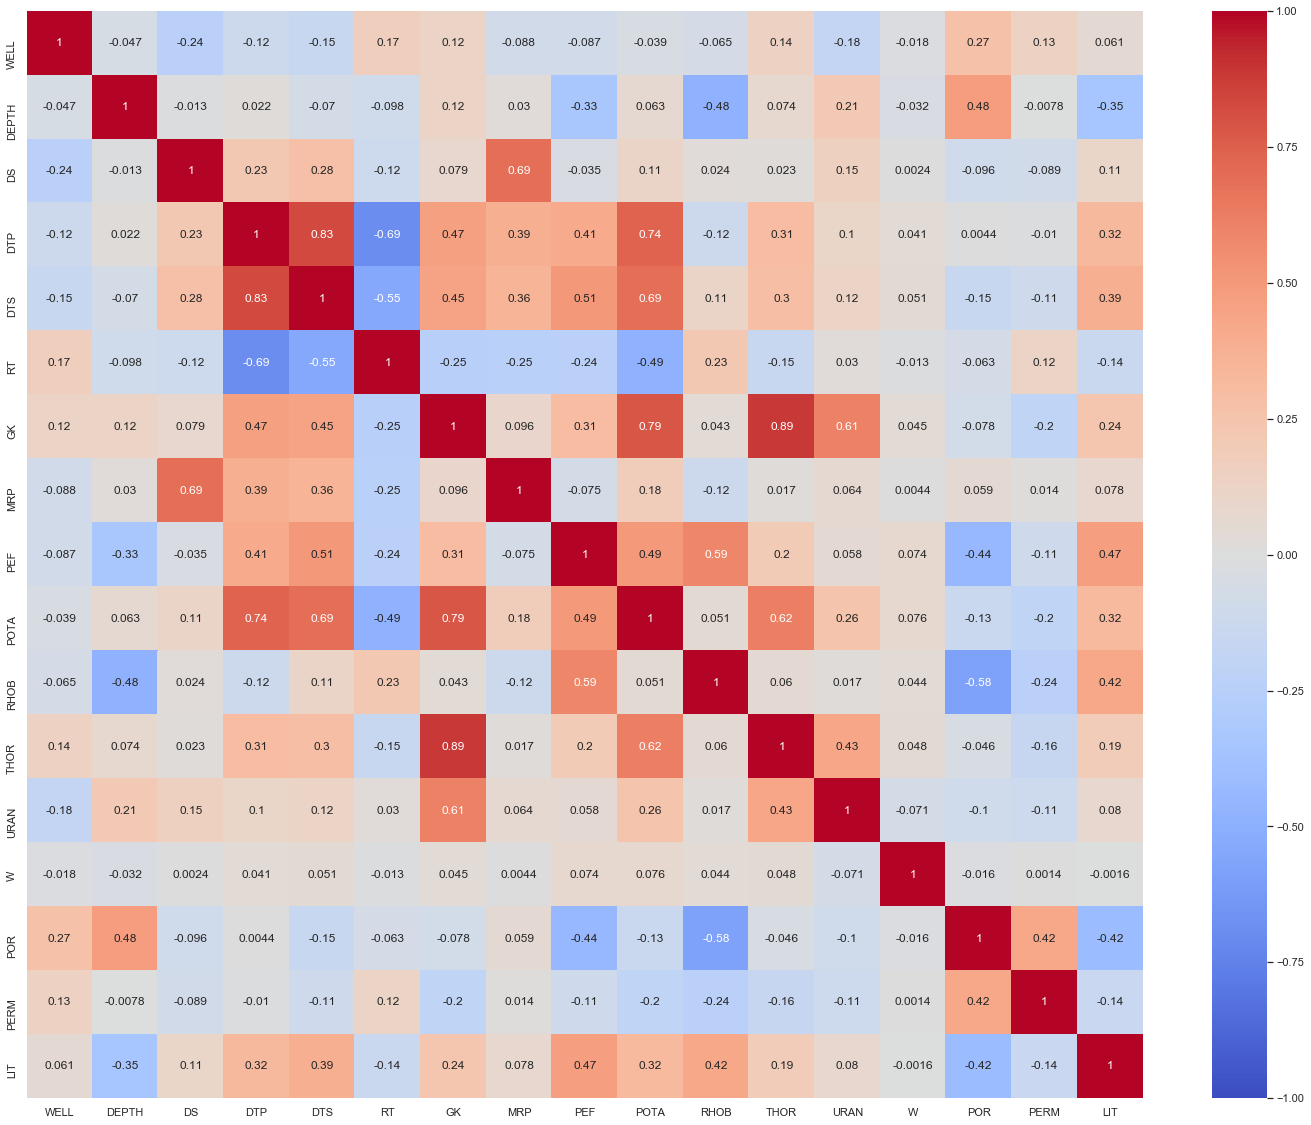

In [330]:
corr = df.corr()
plt.figure(figsize = (25,20)) #Постройка тепловой карты, отображающая коэфициент корелляции
sns.heatmap(corr, vmin = -1, cmap='coolwarm', annot=True)

Text(0.5, 1.0, 'Литология vs Ошибки')

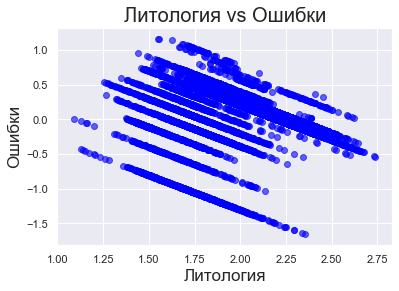

In [363]:
plt.scatter(x = results.fittedvalues, y = results.resid, c = 'blue', alpha = 0.6)

plt.xlabel('Литология',fontsize=17)
plt.ylabel('Ошибки',fontsize=17)
plt.title('Литология vs Ошибки', fontsize = 20)

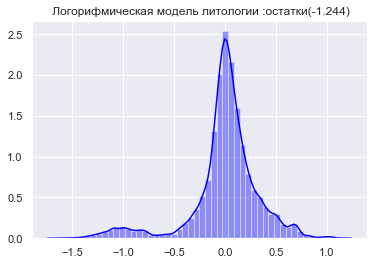

In [364]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'blue')
plt.title(f' Логорифмическая модель литологии :остатки({resid_skew})')
plt.show()
# по графику видно, что данные подчиняются закону нормального распределения

## Лассо

In [353]:
df = pd.read_csv(r"LOG_Case_lit.csv",comment=";")

In [354]:
lit = df['LIT']
features = df.drop('LIT', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,lit, test_size = 0.2, random_state = 10)

In [355]:
lasso_model = Lasso()
lasso_model.fit(X=x_train, y=y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [356]:
y_log = np.log(df['PERM'])
y_log.tail()

17747   -0.479906
17748   -0.479906
17749   -0.479906
17750   -0.479906
17751   -0.479906
Name: PERM, dtype: float64

In [357]:
lit = np.log(df['LIT'])
features = df.drop('LIT', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,lit, test_size = 0.2, random_state = 10)

reqr = Lasso()
reqr.fit(x_train, y_train)

print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))
print('intercept',reqr.intercept_)
pd.DataFrame(data=reqr.coef_, index=x_train.columns, columns=['coef'])

точность прогноза для тренировочных данных =  0.23760386726568375
точность прогноза для тестовых данных  =  0.23663670822692928
intercept 3.2002663091014085


,coef
WELL,0.000000
DEPTH,-0.001193
DS,0.000000
DTP,0.000000
DTS,0.002040
RT,0.000000
GK,0.000000
MRP,-0.000000
PEF,0.000000
POTA,0.000000


## Метод ближайших точек

In [99]:
df = pd.read_csv(r"LOG_Case_lit.csv",comment=";")

FileNotFoundError: [Errno 2] File LOG_Case_lit.csv does not exist: 'LOG_Case_lit.csv'

In [98]:
lit = np.log(df['LIT'])
features = df.drop('LIT', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,lit, test_size = 0.2, random_state = 10)

reqr = neighbors.KNeighborsRegressor()
reqr.fit(x_train, y_train)

print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Градиентный бустинг на рещающих деревьях

In [436]:
df = pd.read_csv(r"LOG_Case_lit.csv",comment=";")

In [349]:
lit = np.log(df['LIT'])
features = df.drop('LIT', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,lit, test_size = 0.3, random_state = 10)


reqr = XGBRegressor()
reqr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [350]:
n_estimators = [1, 10, 50, 100, 1000, 10000]

In [344]:
scores = []
for i in n_estimators:
    xgbr = XGBRegressor(max_depth=6, learning_rate=0.9, n_estimators=i)
    xgbr.fit(x_train, y_train)
    y_pred = xgbr.predict(x_test)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)


In [352]:
print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))
# различие в прогнозе для тренировочных данных и тестовых приемлимое - это означает, что
# глубина деревьев подобрана верно и модель не "заучивает", а обучается

точность прогноза для тренировочных данных =  0.9838498894352021
точность прогноза для тестовых данных  =  0.8516184846280841


## Литология по проницаемости и пористости

In [459]:
df = pd.read_csv(r"LOG_Case_lit.csv",comment=";")

In [460]:
df.drop(labels=['RHOB'], axis=1, inplace=True)
df.drop(labels=['DEPTH'], axis=1, inplace=True)
df.drop(labels=['W'], axis=1, inplace=True)
df.drop(labels=['DS'], axis=1, inplace=True) 
df.drop(labels=['RT'], axis=1, inplace=True)
df.drop(labels=['PEF'], axis=1, inplace=True)
df.drop(labels=['THOR'], axis=1, inplace=True)
df.drop(labels=['WELL'], axis=1, inplace=True)
df.drop(labels=['GK'], axis=1, inplace=True)
df.drop(labels=['URAN'], axis=1, inplace=True)
df.drop(labels=['POTA'], axis=1, inplace=True)
df.drop(labels=['MRP'], axis=1, inplace=True)
df.drop(labels=['DTS'], axis=1, inplace=True)
df.drop(labels=['DTP'], axis=1, inplace=True)

In [461]:
df

,POR,PERM,LIT
0,2.115032,0.894270,10
1,2.115032,0.894270,10
2,2.115032,0.894270,10
3,2.115032,0.894270,10
4,2.115032,0.894270,10
...,...,...,...
17747,7.207200,0.618842,5
17748,7.207200,0.618842,5
17749,7.207200,0.618842,5
17750,7.207200,0.618842,5


In [462]:
cbr = CatBoostRegressor(iterations=1000, learning_rate=1, depth=None,)
cbr.fit(x_train, y_train)
y_pred = cbr.predict(x_test)

0:	learn: 0.3789118	total: 9.71ms	remaining: 9.7s
1:	learn: 0.3689415	total: 17.4ms	remaining: 8.66s
2:	learn: 0.3593318	total: 26ms	remaining: 8.63s
3:	learn: 0.3547932	total: 34ms	remaining: 8.47s
4:	learn: 0.3485914	total: 44.2ms	remaining: 8.8s
5:	learn: 0.3390422	total: 53.6ms	remaining: 8.88s
6:	learn: 0.3352273	total: 62.4ms	remaining: 8.85s
7:	learn: 0.3301928	total: 70.9ms	remaining: 8.79s
8:	learn: 0.3274160	total: 79.8ms	remaining: 8.78s
9:	learn: 0.3260069	total: 88.7ms	remaining: 8.79s
10:	learn: 0.3219146	total: 98.6ms	remaining: 8.86s
11:	learn: 0.3189224	total: 107ms	remaining: 8.84s
12:	learn: 0.3133445	total: 116ms	remaining: 8.84s
13:	learn: 0.3098829	total: 132ms	remaining: 9.31s
14:	learn: 0.3077908	total: 140ms	remaining: 9.18s
15:	learn: 0.3049959	total: 148ms	remaining: 9.13s
16:	learn: 0.3026004	total: 157ms	remaining: 9.07s
17:	learn: 0.3005702	total: 165ms	remaining: 9.01s
18:	learn: 0.2982030	total: 173ms	remaining: 8.95s
19:	learn: 0.2954379	total: 182ms	re

162:	learn: 0.1986500	total: 2.04s	remaining: 10.5s
163:	learn: 0.1984052	total: 2.06s	remaining: 10.5s
164:	learn: 0.1983048	total: 2.08s	remaining: 10.5s
165:	learn: 0.1982681	total: 2.11s	remaining: 10.6s
166:	learn: 0.1980517	total: 2.12s	remaining: 10.6s
167:	learn: 0.1978942	total: 2.13s	remaining: 10.6s
168:	learn: 0.1976470	total: 2.15s	remaining: 10.6s
169:	learn: 0.1976207	total: 2.16s	remaining: 10.5s
170:	learn: 0.1975072	total: 2.18s	remaining: 10.6s
171:	learn: 0.1973786	total: 2.19s	remaining: 10.5s
172:	learn: 0.1972399	total: 2.2s	remaining: 10.5s
173:	learn: 0.1970347	total: 2.21s	remaining: 10.5s
174:	learn: 0.1969059	total: 2.22s	remaining: 10.5s
175:	learn: 0.1967364	total: 2.24s	remaining: 10.5s
176:	learn: 0.1965987	total: 2.25s	remaining: 10.5s
177:	learn: 0.1964540	total: 2.28s	remaining: 10.5s
178:	learn: 0.1962137	total: 2.31s	remaining: 10.6s
179:	learn: 0.1961683	total: 2.31s	remaining: 10.5s
180:	learn: 0.1960539	total: 2.32s	remaining: 10.5s
181:	learn: 0

326:	learn: 0.1821268	total: 4.14s	remaining: 8.53s
327:	learn: 0.1821039	total: 4.16s	remaining: 8.52s
328:	learn: 0.1819126	total: 4.18s	remaining: 8.52s
329:	learn: 0.1818538	total: 4.19s	remaining: 8.5s
330:	learn: 0.1817989	total: 4.2s	remaining: 8.48s
331:	learn: 0.1817837	total: 4.21s	remaining: 8.46s
332:	learn: 0.1817160	total: 4.21s	remaining: 8.44s
333:	learn: 0.1816817	total: 4.22s	remaining: 8.42s
334:	learn: 0.1816128	total: 4.23s	remaining: 8.4s
335:	learn: 0.1815540	total: 4.24s	remaining: 8.38s
336:	learn: 0.1815004	total: 4.25s	remaining: 8.36s
337:	learn: 0.1814460	total: 4.26s	remaining: 8.34s
338:	learn: 0.1814370	total: 4.27s	remaining: 8.32s
339:	learn: 0.1813872	total: 4.28s	remaining: 8.3s
340:	learn: 0.1812715	total: 4.29s	remaining: 8.28s
341:	learn: 0.1811496	total: 4.29s	remaining: 8.26s
342:	learn: 0.1810810	total: 4.31s	remaining: 8.25s
343:	learn: 0.1810423	total: 4.32s	remaining: 8.24s
344:	learn: 0.1809070	total: 4.33s	remaining: 8.23s
345:	learn: 0.18

494:	learn: 0.1752436	total: 7.27s	remaining: 7.42s
495:	learn: 0.1752215	total: 7.28s	remaining: 7.4s
496:	learn: 0.1752009	total: 7.29s	remaining: 7.38s
497:	learn: 0.1751932	total: 7.31s	remaining: 7.37s
498:	learn: 0.1751664	total: 7.33s	remaining: 7.36s
499:	learn: 0.1751509	total: 7.34s	remaining: 7.34s
500:	learn: 0.1751218	total: 7.35s	remaining: 7.32s
501:	learn: 0.1751116	total: 7.36s	remaining: 7.3s
502:	learn: 0.1750838	total: 7.37s	remaining: 7.28s
503:	learn: 0.1750398	total: 7.38s	remaining: 7.26s
504:	learn: 0.1750139	total: 7.39s	remaining: 7.24s
505:	learn: 0.1749887	total: 7.4s	remaining: 7.22s
506:	learn: 0.1749782	total: 7.41s	remaining: 7.2s
507:	learn: 0.1749569	total: 7.41s	remaining: 7.18s
508:	learn: 0.1749476	total: 7.42s	remaining: 7.16s
509:	learn: 0.1749405	total: 7.43s	remaining: 7.14s
510:	learn: 0.1749257	total: 7.45s	remaining: 7.13s
511:	learn: 0.1749186	total: 7.46s	remaining: 7.11s
512:	learn: 0.1749077	total: 7.47s	remaining: 7.09s
513:	learn: 0.17

656:	learn: 0.1727950	total: 9.02s	remaining: 4.71s
657:	learn: 0.1727844	total: 9.04s	remaining: 4.7s
658:	learn: 0.1727718	total: 9.05s	remaining: 4.68s
659:	learn: 0.1727688	total: 9.07s	remaining: 4.67s
660:	learn: 0.1727652	total: 9.08s	remaining: 4.66s
661:	learn: 0.1727450	total: 9.09s	remaining: 4.64s
662:	learn: 0.1727410	total: 9.1s	remaining: 4.63s
663:	learn: 0.1727278	total: 9.11s	remaining: 4.61s
664:	learn: 0.1727213	total: 9.12s	remaining: 4.59s
665:	learn: 0.1727118	total: 9.13s	remaining: 4.58s
666:	learn: 0.1727086	total: 9.13s	remaining: 4.56s
667:	learn: 0.1727047	total: 9.14s	remaining: 4.54s
668:	learn: 0.1727037	total: 9.15s	remaining: 4.53s
669:	learn: 0.1726922	total: 9.16s	remaining: 4.51s
670:	learn: 0.1726828	total: 9.21s	remaining: 4.52s
671:	learn: 0.1726578	total: 9.22s	remaining: 4.5s
672:	learn: 0.1726459	total: 9.23s	remaining: 4.49s
673:	learn: 0.1726404	total: 9.24s	remaining: 4.47s
674:	learn: 0.1726264	total: 9.25s	remaining: 4.45s
675:	learn: 0.1

830:	learn: 0.1715548	total: 10.9s	remaining: 2.22s
831:	learn: 0.1715542	total: 11s	remaining: 2.21s
832:	learn: 0.1715520	total: 11s	remaining: 2.2s
833:	learn: 0.1715510	total: 11s	remaining: 2.19s
834:	learn: 0.1715460	total: 11s	remaining: 2.17s
835:	learn: 0.1715429	total: 11s	remaining: 2.16s
836:	learn: 0.1715389	total: 11s	remaining: 2.15s
837:	learn: 0.1715332	total: 11s	remaining: 2.13s
838:	learn: 0.1715293	total: 11.1s	remaining: 2.12s
839:	learn: 0.1715284	total: 11.1s	remaining: 2.11s
840:	learn: 0.1715207	total: 11.1s	remaining: 2.09s
841:	learn: 0.1715196	total: 11.1s	remaining: 2.08s
842:	learn: 0.1715143	total: 11.1s	remaining: 2.06s
843:	learn: 0.1715109	total: 11.1s	remaining: 2.05s
844:	learn: 0.1715067	total: 11.1s	remaining: 2.04s
845:	learn: 0.1715031	total: 11.1s	remaining: 2.03s
846:	learn: 0.1714985	total: 11.1s	remaining: 2.01s
847:	learn: 0.1714945	total: 11.2s	remaining: 2s
848:	learn: 0.1714928	total: 11.2s	remaining: 1.98s
849:	learn: 0.1714868	total: 1

998:	learn: 0.1711049	total: 12.9s	remaining: 12.9ms
999:	learn: 0.1711024	total: 12.9s	remaining: 0us


In [463]:
lit = np.log(df['LIT'])
features = df.drop('LIT', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features,lit, test_size = 0.2, random_state = 10)

reqr = CatBoostRegressor()
reqr.fit(x_train, y_train)

Learning rate set to 0.062591
0:	learn: 0.4337936	total: 8.04ms	remaining: 8.03s
1:	learn: 0.4271813	total: 48.9ms	remaining: 24.4s
2:	learn: 0.4210427	total: 57.9ms	remaining: 19.3s
3:	learn: 0.4159172	total: 67.2ms	remaining: 16.7s
4:	learn: 0.4109591	total: 77.1ms	remaining: 15.3s
5:	learn: 0.4066777	total: 86.7ms	remaining: 14.4s
6:	learn: 0.4023056	total: 95.1ms	remaining: 13.5s
7:	learn: 0.3985216	total: 104ms	remaining: 12.9s
8:	learn: 0.3951455	total: 113ms	remaining: 12.4s
9:	learn: 0.3919394	total: 122ms	remaining: 12s
10:	learn: 0.3886626	total: 130ms	remaining: 11.7s
11:	learn: 0.3863595	total: 138ms	remaining: 11.3s
12:	learn: 0.3837119	total: 146ms	remaining: 11.1s
13:	learn: 0.3812258	total: 154ms	remaining: 10.8s
14:	learn: 0.3791078	total: 163ms	remaining: 10.7s
15:	learn: 0.3773311	total: 186ms	remaining: 11.4s
16:	learn: 0.3753301	total: 206ms	remaining: 11.9s
17:	learn: 0.3733196	total: 216ms	remaining: 11.8s
18:	learn: 0.3717797	total: 228ms	remaining: 11.8s
19:	le

170:	learn: 0.3073161	total: 1.89s	remaining: 9.14s
171:	learn: 0.3070842	total: 1.9s	remaining: 9.13s
172:	learn: 0.3068964	total: 1.91s	remaining: 9.14s
173:	learn: 0.3067143	total: 1.93s	remaining: 9.16s
174:	learn: 0.3064925	total: 1.94s	remaining: 9.14s
175:	learn: 0.3062759	total: 1.95s	remaining: 9.12s
176:	learn: 0.3059322	total: 1.96s	remaining: 9.1s
177:	learn: 0.3057067	total: 1.96s	remaining: 9.07s
178:	learn: 0.3054611	total: 1.98s	remaining: 9.06s
179:	learn: 0.3053961	total: 1.98s	remaining: 9.03s
180:	learn: 0.3051906	total: 1.99s	remaining: 9s
181:	learn: 0.3049829	total: 2s	remaining: 8.98s
182:	learn: 0.3047684	total: 2.01s	remaining: 8.96s
183:	learn: 0.3045837	total: 2.02s	remaining: 8.95s
184:	learn: 0.3043851	total: 2.03s	remaining: 8.93s
185:	learn: 0.3042046	total: 2.04s	remaining: 8.91s
186:	learn: 0.3040417	total: 2.04s	remaining: 8.89s
187:	learn: 0.3039359	total: 2.05s	remaining: 8.86s
188:	learn: 0.3038687	total: 2.06s	remaining: 8.85s
189:	learn: 0.303624

338:	learn: 0.2797827	total: 3.61s	remaining: 7.04s
339:	learn: 0.2797287	total: 3.63s	remaining: 7.05s
340:	learn: 0.2795774	total: 3.64s	remaining: 7.04s
341:	learn: 0.2794666	total: 3.65s	remaining: 7.03s
342:	learn: 0.2793449	total: 3.66s	remaining: 7.02s
343:	learn: 0.2792343	total: 3.67s	remaining: 7s
344:	learn: 0.2791659	total: 3.68s	remaining: 6.99s
345:	learn: 0.2791229	total: 3.69s	remaining: 6.97s
346:	learn: 0.2790107	total: 3.69s	remaining: 6.96s
347:	learn: 0.2789208	total: 3.7s	remaining: 6.94s
348:	learn: 0.2788647	total: 3.71s	remaining: 6.92s
349:	learn: 0.2787524	total: 3.72s	remaining: 6.91s
350:	learn: 0.2786147	total: 3.73s	remaining: 6.9s
351:	learn: 0.2785291	total: 3.74s	remaining: 6.89s
352:	learn: 0.2784524	total: 3.75s	remaining: 6.87s
353:	learn: 0.2783930	total: 3.76s	remaining: 6.86s
354:	learn: 0.2781942	total: 3.77s	remaining: 6.85s
355:	learn: 0.2780235	total: 3.78s	remaining: 6.84s
356:	learn: 0.2779048	total: 3.81s	remaining: 6.87s
357:	learn: 0.277

507:	learn: 0.2635399	total: 5.33s	remaining: 5.16s
508:	learn: 0.2634160	total: 5.35s	remaining: 5.16s
509:	learn: 0.2632917	total: 5.37s	remaining: 5.16s
510:	learn: 0.2632472	total: 5.38s	remaining: 5.15s
511:	learn: 0.2632276	total: 5.39s	remaining: 5.14s
512:	learn: 0.2631248	total: 5.41s	remaining: 5.13s
513:	learn: 0.2630373	total: 5.42s	remaining: 5.12s
514:	learn: 0.2629774	total: 5.45s	remaining: 5.13s
515:	learn: 0.2627754	total: 5.46s	remaining: 5.12s
516:	learn: 0.2626793	total: 5.47s	remaining: 5.11s
517:	learn: 0.2626544	total: 5.48s	remaining: 5.1s
518:	learn: 0.2626262	total: 5.49s	remaining: 5.08s
519:	learn: 0.2624854	total: 5.5s	remaining: 5.07s
520:	learn: 0.2624727	total: 5.5s	remaining: 5.06s
521:	learn: 0.2624276	total: 5.52s	remaining: 5.06s
522:	learn: 0.2624053	total: 5.53s	remaining: 5.05s
523:	learn: 0.2622816	total: 5.54s	remaining: 5.04s
524:	learn: 0.2622477	total: 5.55s	remaining: 5.02s
525:	learn: 0.2622208	total: 5.56s	remaining: 5.01s
526:	learn: 0.2

674:	learn: 0.2517136	total: 7.25s	remaining: 3.49s
675:	learn: 0.2517042	total: 7.27s	remaining: 3.48s
676:	learn: 0.2516354	total: 7.3s	remaining: 3.48s
677:	learn: 0.2516184	total: 7.3s	remaining: 3.47s
678:	learn: 0.2515589	total: 7.31s	remaining: 3.46s
679:	learn: 0.2515218	total: 7.32s	remaining: 3.45s
680:	learn: 0.2514345	total: 7.33s	remaining: 3.43s
681:	learn: 0.2513674	total: 7.35s	remaining: 3.42s
682:	learn: 0.2512942	total: 7.36s	remaining: 3.41s
683:	learn: 0.2512553	total: 7.37s	remaining: 3.4s
684:	learn: 0.2511589	total: 7.37s	remaining: 3.39s
685:	learn: 0.2510853	total: 7.38s	remaining: 3.38s
686:	learn: 0.2510694	total: 7.39s	remaining: 3.37s
687:	learn: 0.2509701	total: 7.4s	remaining: 3.35s
688:	learn: 0.2508897	total: 7.41s	remaining: 3.34s
689:	learn: 0.2508629	total: 7.41s	remaining: 3.33s
690:	learn: 0.2507894	total: 7.43s	remaining: 3.32s
691:	learn: 0.2507716	total: 7.45s	remaining: 3.31s
692:	learn: 0.2507100	total: 7.46s	remaining: 3.31s
693:	learn: 0.25

840:	learn: 0.2426190	total: 8.99s	remaining: 1.7s
841:	learn: 0.2425649	total: 9.01s	remaining: 1.69s
842:	learn: 0.2425428	total: 9.02s	remaining: 1.68s
843:	learn: 0.2425289	total: 9.03s	remaining: 1.67s
844:	learn: 0.2424765	total: 9.04s	remaining: 1.66s
845:	learn: 0.2424657	total: 9.05s	remaining: 1.65s
846:	learn: 0.2424547	total: 9.05s	remaining: 1.64s
847:	learn: 0.2424270	total: 9.06s	remaining: 1.62s
848:	learn: 0.2423755	total: 9.07s	remaining: 1.61s
849:	learn: 0.2423574	total: 9.08s	remaining: 1.6s
850:	learn: 0.2423370	total: 9.09s	remaining: 1.59s
851:	learn: 0.2423242	total: 9.1s	remaining: 1.58s
852:	learn: 0.2422528	total: 9.11s	remaining: 1.57s
853:	learn: 0.2422202	total: 9.12s	remaining: 1.56s
854:	learn: 0.2421714	total: 9.13s	remaining: 1.55s
855:	learn: 0.2421364	total: 9.14s	remaining: 1.54s
856:	learn: 0.2420594	total: 9.15s	remaining: 1.53s
857:	learn: 0.2420172	total: 9.16s	remaining: 1.51s
858:	learn: 0.2419821	total: 9.17s	remaining: 1.5s
859:	learn: 0.24

999:	learn: 0.2359496	total: 10.6s	remaining: 0us


In [464]:
print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))
print('точность прогноза для тестовых данных  = ', reqr.score(x_test, y_test))

точность прогноза для тренировочных данных =  0.713464261319547
точность прогноза для тестовых данных  =  0.6576004733537483


## Тестовый датасет

### Проницаемость

In [49]:
data = pd.read_csv(r"C:\Users\кристина работа\Desktop\УТ 2022\Исходные данные\vot\dataset\LOG_Case_vse (1).csv",comment=";")

In [50]:
data_train = abs(np.log(data[data.index<14201])) #создание нового датасета для тестирования (тестовая выборка)
data_test = abs(np.log(data[data.index>17751]))

In [51]:
x_test=data_test.drop(labels=['PERM'], axis=1, inplace=False)
x_train=data_train.drop(labels=['PERM'], axis=1, inplace=False)
y_train=data_train['PERM']
y_test=data_test['PERM']

In [52]:
cbr = CatBoostRegressor(iterations=1000, learning_rate=1, depth=None,)
cbr.fit(x_train, y_train)
y_pred = cbr.predict(x_test)

0:	learn: 1.3098330	total: 22.7ms	remaining: 22.6s
1:	learn: 1.0241285	total: 98.4ms	remaining: 49.1s
2:	learn: 0.9219776	total: 119ms	remaining: 39.6s
3:	learn: 0.8729224	total: 176ms	remaining: 43.9s
4:	learn: 0.8544353	total: 274ms	remaining: 54.5s
5:	learn: 0.7933936	total: 301ms	remaining: 49.9s
6:	learn: 0.7685104	total: 347ms	remaining: 49.3s
7:	learn: 0.7423026	total: 373ms	remaining: 46.3s
8:	learn: 0.7162353	total: 435ms	remaining: 47.9s
9:	learn: 0.6938186	total: 454ms	remaining: 44.9s
10:	learn: 0.6710154	total: 513ms	remaining: 46.1s
11:	learn: 0.6611003	total: 532ms	remaining: 43.8s
12:	learn: 0.6437666	total: 593ms	remaining: 45s
13:	learn: 0.6306633	total: 634ms	remaining: 44.7s
14:	learn: 0.6145857	total: 758ms	remaining: 49.8s
15:	learn: 0.6042783	total: 784ms	remaining: 48.2s
16:	learn: 0.5867104	total: 861ms	remaining: 49.8s
17:	learn: 0.5669566	total: 930ms	remaining: 50.8s
18:	learn: 0.5566164	total: 1s	remaining: 51.9s
19:	learn: 0.5506533	total: 1.05s	remaining:

161:	learn: 0.2143028	total: 7.94s	remaining: 41.1s
162:	learn: 0.2138872	total: 7.96s	remaining: 40.9s
163:	learn: 0.2132523	total: 8.02s	remaining: 40.9s
164:	learn: 0.2121816	total: 8.06s	remaining: 40.8s
165:	learn: 0.2108534	total: 8.09s	remaining: 40.6s
166:	learn: 0.2097035	total: 8.12s	remaining: 40.5s
167:	learn: 0.2090382	total: 8.18s	remaining: 40.5s
168:	learn: 0.2083601	total: 8.2s	remaining: 40.3s
169:	learn: 0.2074943	total: 8.24s	remaining: 40.2s
170:	learn: 0.2065931	total: 8.26s	remaining: 40.1s
171:	learn: 0.2051650	total: 8.31s	remaining: 40s
172:	learn: 0.2046464	total: 8.33s	remaining: 39.8s
173:	learn: 0.2037356	total: 8.37s	remaining: 39.7s
174:	learn: 0.2029633	total: 8.39s	remaining: 39.6s
175:	learn: 0.2023092	total: 8.45s	remaining: 39.6s
176:	learn: 0.2017363	total: 8.47s	remaining: 39.4s
177:	learn: 0.2009644	total: 8.59s	remaining: 39.7s
178:	learn: 0.1999861	total: 8.61s	remaining: 39.5s
179:	learn: 0.1990408	total: 8.73s	remaining: 39.8s
180:	learn: 0.1

321:	learn: 0.1265934	total: 15.4s	remaining: 32.4s
322:	learn: 0.1262593	total: 15.4s	remaining: 32.4s
323:	learn: 0.1260205	total: 15.6s	remaining: 32.5s
324:	learn: 0.1258173	total: 15.6s	remaining: 32.4s
325:	learn: 0.1252198	total: 15.7s	remaining: 32.5s
326:	learn: 0.1247676	total: 15.7s	remaining: 32.4s
327:	learn: 0.1244282	total: 15.8s	remaining: 32.3s
328:	learn: 0.1240635	total: 15.8s	remaining: 32.3s
329:	learn: 0.1236137	total: 15.8s	remaining: 32.2s
330:	learn: 0.1232962	total: 15.9s	remaining: 32.2s
331:	learn: 0.1230665	total: 15.9s	remaining: 32.1s
332:	learn: 0.1227169	total: 16s	remaining: 32s
333:	learn: 0.1224163	total: 16.1s	remaining: 32s
334:	learn: 0.1220176	total: 16.1s	remaining: 32.1s
335:	learn: 0.1217350	total: 16.2s	remaining: 32s
336:	learn: 0.1212809	total: 16.2s	remaining: 31.9s
337:	learn: 0.1208135	total: 16.2s	remaining: 31.8s
338:	learn: 0.1206547	total: 16.4s	remaining: 31.9s
339:	learn: 0.1203924	total: 16.4s	remaining: 31.8s
340:	learn: 0.120035

482:	learn: 0.0861856	total: 22.7s	remaining: 24.3s
483:	learn: 0.0859410	total: 22.8s	remaining: 24.3s
484:	learn: 0.0857103	total: 22.9s	remaining: 24.3s
485:	learn: 0.0855759	total: 22.9s	remaining: 24.2s
486:	learn: 0.0853659	total: 22.9s	remaining: 24.1s
487:	learn: 0.0850361	total: 22.9s	remaining: 24.1s
488:	learn: 0.0847812	total: 23s	remaining: 24s
489:	learn: 0.0846518	total: 23s	remaining: 23.9s
490:	learn: 0.0844486	total: 23s	remaining: 23.9s
491:	learn: 0.0842974	total: 23s	remaining: 23.8s
492:	learn: 0.0840969	total: 23.1s	remaining: 23.8s
493:	learn: 0.0837878	total: 23.1s	remaining: 23.7s
494:	learn: 0.0836131	total: 23.2s	remaining: 23.6s
495:	learn: 0.0834432	total: 23.2s	remaining: 23.6s
496:	learn: 0.0830802	total: 23.2s	remaining: 23.5s
497:	learn: 0.0829562	total: 23.3s	remaining: 23.5s
498:	learn: 0.0828154	total: 23.4s	remaining: 23.5s
499:	learn: 0.0826546	total: 23.4s	remaining: 23.4s
500:	learn: 0.0824061	total: 23.5s	remaining: 23.4s
501:	learn: 0.0822458	

644:	learn: 0.0607620	total: 32.9s	remaining: 18.1s
645:	learn: 0.0606575	total: 32.9s	remaining: 18s
646:	learn: 0.0605622	total: 33s	remaining: 18s
647:	learn: 0.0604286	total: 33s	remaining: 17.9s
648:	learn: 0.0602916	total: 33s	remaining: 17.9s
649:	learn: 0.0601659	total: 33.1s	remaining: 17.8s
650:	learn: 0.0600197	total: 33.2s	remaining: 17.8s
651:	learn: 0.0598574	total: 33.2s	remaining: 17.7s
652:	learn: 0.0597451	total: 33.3s	remaining: 17.7s
653:	learn: 0.0596240	total: 33.4s	remaining: 17.7s
654:	learn: 0.0595113	total: 33.5s	remaining: 17.6s
655:	learn: 0.0594035	total: 33.6s	remaining: 17.6s
656:	learn: 0.0592731	total: 33.6s	remaining: 17.5s
657:	learn: 0.0591895	total: 33.7s	remaining: 17.5s
658:	learn: 0.0591086	total: 33.7s	remaining: 17.4s
659:	learn: 0.0589856	total: 33.8s	remaining: 17.4s
660:	learn: 0.0589074	total: 33.8s	remaining: 17.4s
661:	learn: 0.0588142	total: 33.9s	remaining: 17.3s
662:	learn: 0.0587187	total: 33.9s	remaining: 17.2s
663:	learn: 0.0586218	

804:	learn: 0.0455547	total: 41s	remaining: 9.94s
805:	learn: 0.0454978	total: 41.1s	remaining: 9.89s
806:	learn: 0.0454031	total: 41.1s	remaining: 9.83s
807:	learn: 0.0452832	total: 41.2s	remaining: 9.78s
808:	learn: 0.0452180	total: 41.2s	remaining: 9.72s
809:	learn: 0.0451677	total: 41.3s	remaining: 9.68s
810:	learn: 0.0450932	total: 41.3s	remaining: 9.63s
811:	learn: 0.0450090	total: 41.4s	remaining: 9.58s
812:	learn: 0.0449288	total: 41.4s	remaining: 9.52s
813:	learn: 0.0448737	total: 41.4s	remaining: 9.46s
814:	learn: 0.0447730	total: 41.5s	remaining: 9.42s
815:	learn: 0.0446894	total: 41.6s	remaining: 9.37s
816:	learn: 0.0445900	total: 41.6s	remaining: 9.31s
817:	learn: 0.0445328	total: 41.6s	remaining: 9.27s
818:	learn: 0.0444749	total: 41.7s	remaining: 9.21s
819:	learn: 0.0443800	total: 41.7s	remaining: 9.16s
820:	learn: 0.0443248	total: 41.8s	remaining: 9.11s
821:	learn: 0.0442509	total: 41.9s	remaining: 9.06s
822:	learn: 0.0441942	total: 41.9s	remaining: 9.01s
823:	learn: 0.

963:	learn: 0.0355233	total: 50.4s	remaining: 1.88s
964:	learn: 0.0354598	total: 50.4s	remaining: 1.83s
965:	learn: 0.0353969	total: 50.5s	remaining: 1.78s
966:	learn: 0.0353433	total: 50.5s	remaining: 1.72s
967:	learn: 0.0353012	total: 50.6s	remaining: 1.67s
968:	learn: 0.0352523	total: 50.7s	remaining: 1.62s
969:	learn: 0.0351961	total: 50.7s	remaining: 1.57s
970:	learn: 0.0351527	total: 50.8s	remaining: 1.52s
971:	learn: 0.0350856	total: 50.9s	remaining: 1.46s
972:	learn: 0.0349997	total: 50.9s	remaining: 1.41s
973:	learn: 0.0349514	total: 51s	remaining: 1.36s
974:	learn: 0.0349149	total: 51s	remaining: 1.31s
975:	learn: 0.0348405	total: 51s	remaining: 1.25s
976:	learn: 0.0347967	total: 51.1s	remaining: 1.2s
977:	learn: 0.0347549	total: 51.1s	remaining: 1.15s
978:	learn: 0.0346951	total: 51.2s	remaining: 1.1s
979:	learn: 0.0346376	total: 51.2s	remaining: 1.04s
980:	learn: 0.0345895	total: 51.3s	remaining: 994ms
981:	learn: 0.0345421	total: 51.4s	remaining: 942ms
982:	learn: 0.034502

In [53]:
# не запускайте после этого кода слишком большие таблицы, может ждать неожиданный сюрприз для вашей оперативки
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [40]:
a =np.log(abs(y_pred))
tabl = pd.DataFrame({'Проницаемость':a})
abs(tabl)

,Проницаемость
0,1.095626
1,1.551528
2,0.703746
3,0.093449
4,0.878513
5,0.947017
6,0.034927
7,0.401029
8,0.376627
9,1.059082


In [54]:
print('точность прогноза для тренировочных данных = ', reqr.score(x_train, y_train))

точность прогноза для тренировочных данных =  -10.22480800098128


### Литология

In [81]:
dataf = pd.read_csv(r"Dadatset_prediction_LIT.csv",comment=";")

In [82]:
data_train = abs(np.log(dataf[dataf.index<17429])) #создание нового датасета для тестирования (тестовая выборка)
data_test = abs(np.log(dataf[dataf.index>17751]))

In [83]:
y_train=data_train['LIT']
y_test=data_test['LIT']

In [84]:
cbr = CatBoostRegressor(iterations=1000, learning_rate=1, depth=None,)
cbr.fit(x_train, y_train)
y_pred = cbr.predict(x_test)

0:	learn: 0.3262497	total: 66.1ms	remaining: 1m 6s
1:	learn: 0.3103899	total: 87.1ms	remaining: 43.5s
2:	learn: 0.2985937	total: 122ms	remaining: 40.6s
3:	learn: 0.2905031	total: 141ms	remaining: 35s
4:	learn: 0.2775192	total: 163ms	remaining: 32.4s
5:	learn: 0.2707451	total: 191ms	remaining: 31.7s
6:	learn: 0.2651973	total: 211ms	remaining: 30s
7:	learn: 0.2610815	total: 232ms	remaining: 28.7s
8:	learn: 0.2573273	total: 251ms	remaining: 27.7s
9:	learn: 0.2532333	total: 274ms	remaining: 27.1s
10:	learn: 0.2495166	total: 294ms	remaining: 26.4s
11:	learn: 0.2453179	total: 315ms	remaining: 25.9s
12:	learn: 0.2413093	total: 344ms	remaining: 26.1s
13:	learn: 0.2361606	total: 370ms	remaining: 26s
14:	learn: 0.2303629	total: 390ms	remaining: 25.6s
15:	learn: 0.2272471	total: 410ms	remaining: 25.2s
16:	learn: 0.2226040	total: 432ms	remaining: 25s
17:	learn: 0.2178500	total: 454ms	remaining: 24.8s
18:	learn: 0.2135297	total: 477ms	remaining: 24.6s
19:	learn: 0.2110648	total: 515ms	remaining: 25

163:	learn: 0.0948988	total: 4.04s	remaining: 20.6s
164:	learn: 0.0944552	total: 4.06s	remaining: 20.5s
165:	learn: 0.0942501	total: 4.08s	remaining: 20.5s
166:	learn: 0.0940499	total: 4.1s	remaining: 20.5s
167:	learn: 0.0937227	total: 4.12s	remaining: 20.4s
168:	learn: 0.0935227	total: 4.14s	remaining: 20.4s
169:	learn: 0.0931416	total: 4.16s	remaining: 20.3s
170:	learn: 0.0927222	total: 4.18s	remaining: 20.3s
171:	learn: 0.0924379	total: 4.2s	remaining: 20.2s
172:	learn: 0.0920095	total: 4.22s	remaining: 20.2s
173:	learn: 0.0918123	total: 4.24s	remaining: 20.1s
174:	learn: 0.0915926	total: 4.26s	remaining: 20.1s
175:	learn: 0.0912562	total: 4.28s	remaining: 20s
176:	learn: 0.0909464	total: 4.3s	remaining: 20s
177:	learn: 0.0907619	total: 4.32s	remaining: 19.9s
178:	learn: 0.0905202	total: 4.34s	remaining: 19.9s
179:	learn: 0.0898907	total: 4.36s	remaining: 19.9s
180:	learn: 0.0896713	total: 4.38s	remaining: 19.8s
181:	learn: 0.0894989	total: 4.4s	remaining: 19.8s
182:	learn: 0.089147

329:	learn: 0.0593435	total: 7.39s	remaining: 15s
330:	learn: 0.0592205	total: 7.41s	remaining: 15s
331:	learn: 0.0590964	total: 7.43s	remaining: 14.9s
332:	learn: 0.0589336	total: 7.45s	remaining: 14.9s
333:	learn: 0.0588168	total: 7.47s	remaining: 14.9s
334:	learn: 0.0585490	total: 7.49s	remaining: 14.9s
335:	learn: 0.0583990	total: 7.51s	remaining: 14.8s
336:	learn: 0.0583202	total: 7.53s	remaining: 14.8s
337:	learn: 0.0581620	total: 7.54s	remaining: 14.8s
338:	learn: 0.0580726	total: 7.57s	remaining: 14.8s
339:	learn: 0.0578884	total: 7.59s	remaining: 14.7s
340:	learn: 0.0577397	total: 7.61s	remaining: 14.7s
341:	learn: 0.0575975	total: 7.63s	remaining: 14.7s
342:	learn: 0.0574292	total: 7.65s	remaining: 14.7s
343:	learn: 0.0573182	total: 7.67s	remaining: 14.6s
344:	learn: 0.0572535	total: 7.69s	remaining: 14.6s
345:	learn: 0.0571334	total: 7.71s	remaining: 14.6s
346:	learn: 0.0570490	total: 7.74s	remaining: 14.6s
347:	learn: 0.0568279	total: 7.76s	remaining: 14.5s
348:	learn: 0.05

495:	learn: 0.0419657	total: 10.7s	remaining: 10.9s
496:	learn: 0.0419083	total: 10.7s	remaining: 10.8s
497:	learn: 0.0418514	total: 10.7s	remaining: 10.8s
498:	learn: 0.0418055	total: 10.7s	remaining: 10.8s
499:	learn: 0.0417567	total: 10.8s	remaining: 10.8s
500:	learn: 0.0416502	total: 10.8s	remaining: 10.7s
501:	learn: 0.0415563	total: 10.8s	remaining: 10.7s
502:	learn: 0.0414212	total: 10.8s	remaining: 10.7s
503:	learn: 0.0413451	total: 10.8s	remaining: 10.7s
504:	learn: 0.0412745	total: 10.9s	remaining: 10.7s
505:	learn: 0.0411482	total: 10.9s	remaining: 10.6s
506:	learn: 0.0410821	total: 10.9s	remaining: 10.6s
507:	learn: 0.0409523	total: 10.9s	remaining: 10.6s
508:	learn: 0.0408868	total: 10.9s	remaining: 10.6s
509:	learn: 0.0408232	total: 11s	remaining: 10.5s
510:	learn: 0.0407476	total: 11s	remaining: 10.5s
511:	learn: 0.0406286	total: 11s	remaining: 10.5s
512:	learn: 0.0405836	total: 11s	remaining: 10.5s
513:	learn: 0.0405316	total: 11s	remaining: 10.4s
514:	learn: 0.0404673	

658:	learn: 0.0318590	total: 14.2s	remaining: 7.36s
659:	learn: 0.0318004	total: 14.2s	remaining: 7.34s
660:	learn: 0.0317706	total: 14.3s	remaining: 7.31s
661:	learn: 0.0317095	total: 14.3s	remaining: 7.29s
662:	learn: 0.0316478	total: 14.3s	remaining: 7.27s
663:	learn: 0.0315889	total: 14.3s	remaining: 7.25s
664:	learn: 0.0315445	total: 14.4s	remaining: 7.23s
665:	learn: 0.0315017	total: 14.4s	remaining: 7.21s
666:	learn: 0.0314466	total: 14.4s	remaining: 7.19s
667:	learn: 0.0313924	total: 14.4s	remaining: 7.17s
668:	learn: 0.0313561	total: 14.4s	remaining: 7.15s
669:	learn: 0.0313126	total: 14.5s	remaining: 7.13s
670:	learn: 0.0312501	total: 14.5s	remaining: 7.11s
671:	learn: 0.0312189	total: 14.5s	remaining: 7.08s
672:	learn: 0.0311893	total: 14.5s	remaining: 7.06s
673:	learn: 0.0311270	total: 14.5s	remaining: 7.04s
674:	learn: 0.0310894	total: 14.6s	remaining: 7.01s
675:	learn: 0.0309834	total: 14.6s	remaining: 6.99s
676:	learn: 0.0309251	total: 14.6s	remaining: 6.97s
677:	learn: 

824:	learn: 0.0248786	total: 18.1s	remaining: 3.85s
825:	learn: 0.0248610	total: 18.1s	remaining: 3.82s
826:	learn: 0.0248099	total: 18.2s	remaining: 3.8s
827:	learn: 0.0247708	total: 18.2s	remaining: 3.78s
828:	learn: 0.0247245	total: 18.2s	remaining: 3.76s
829:	learn: 0.0246726	total: 18.2s	remaining: 3.74s
830:	learn: 0.0246469	total: 18.3s	remaining: 3.72s
831:	learn: 0.0245865	total: 18.3s	remaining: 3.7s
832:	learn: 0.0245454	total: 18.4s	remaining: 3.68s
833:	learn: 0.0244994	total: 18.4s	remaining: 3.66s
834:	learn: 0.0244651	total: 18.4s	remaining: 3.64s
835:	learn: 0.0244335	total: 18.4s	remaining: 3.62s
836:	learn: 0.0243984	total: 18.5s	remaining: 3.6s
837:	learn: 0.0243684	total: 18.5s	remaining: 3.58s
838:	learn: 0.0243346	total: 18.5s	remaining: 3.56s
839:	learn: 0.0242871	total: 18.6s	remaining: 3.53s
840:	learn: 0.0242681	total: 18.6s	remaining: 3.51s
841:	learn: 0.0242373	total: 18.6s	remaining: 3.49s
842:	learn: 0.0241933	total: 18.7s	remaining: 3.48s
843:	learn: 0.0

985:	learn: 0.0199718	total: 22.4s	remaining: 318ms
986:	learn: 0.0199465	total: 22.4s	remaining: 295ms
987:	learn: 0.0198986	total: 22.4s	remaining: 272ms
988:	learn: 0.0198742	total: 22.4s	remaining: 250ms
989:	learn: 0.0198409	total: 22.5s	remaining: 227ms
990:	learn: 0.0198068	total: 22.5s	remaining: 204ms
991:	learn: 0.0197894	total: 22.5s	remaining: 181ms
992:	learn: 0.0197692	total: 22.5s	remaining: 159ms
993:	learn: 0.0197494	total: 22.6s	remaining: 136ms
994:	learn: 0.0197077	total: 22.6s	remaining: 113ms
995:	learn: 0.0196892	total: 22.6s	remaining: 90.7ms
996:	learn: 0.0196626	total: 22.6s	remaining: 68ms
997:	learn: 0.0196340	total: 22.6s	remaining: 45.4ms
998:	learn: 0.0196140	total: 22.7s	remaining: 22.7ms
999:	learn: 0.0195940	total: 22.7s	remaining: 0us


In [85]:
b =np.round (y_pred)
tabl = pd.DataFrame({'Литология':b})
tabl

,Литология
0,2.0
1,2.0
2,1.0
3,2.0
4,2.0
5,1.0
6,2.0
7,2.0
8,2.0
9,2.0


## Визуализация Shap

In [ ]:
import shap
import matplotlib.pyplot as plt

In [ ]:
explainer = shap.TreeExplainer(reqr)

In [ ]:
shap_values = explainer.shap_values(x_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:])

In [ ]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(reqr)
    shap_values = explainer.shap_values(x_test)
    shap.initjs()

    return shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:],matplotlib=True,show=False)
plt.clf()
data_for_prediction = x_test.iloc[2,:].astype(float)
heart_disease_risk_factors(reqr, data_for_prediction)

In [ ]:
shap.summary_plot(shap_values, x_test, plot_size=(17,9))